In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

# Load the dataset
#file_path = 'LanB1_270317_Brownian_Filtered.csv'
file_path = 'Control_270317_Brownian_Filtered.csv'
#file_path ='Scar_130117.csv'
#file_path = 'Control_130117.csv'
#file_path = 'Control_140117.csv'
#file_path = 'Control_191216.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data_info = data.info()
data_head = data.head()
sampled_data_1000 = data.sample(n=1000, random_state=15)
sampled_data_1000.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184063 entries, 0 to 184062
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Position X  184063 non-null  float64
 1   Position Y  184063 non-null  float64
 2   Position Z  184063 non-null  float64
 3   Unit        184063 non-null  object 
 4   Time        184063 non-null  int64  
 5   TrackID     184063 non-null  int64  
 6   ID          184063 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 9.8+ MB


,Position X,Position Y,Position Z,Unit,Time,TrackID,ID
175402,39.8566,220.2400,49.8545,um,385,1000170164,301345
22347,103.9980,80.5511,35.1942,um,53,1000003229,43957
41320,34.3375,361.0700,24.7354,um,96,1000033776,72060
172716,95.2468,370.4860,56.6781,um,380,1000226734,296679
11384,106.2700,86.4585,35.0444,um,28,1000002331,25383


In [2]:

# Filter the data where 'Time' column equals 1
time_1_data = data[data['Time'] == 1]
time_200_data = data[data['Time'] == 200]
time_399_data = data[data['Time'] == 399]
time_400_data = data[data['Time'] == 400]

# Display the first few rows of the filtered data
print(np.array(time_1_data.head())[:, 0: 3])
#print(time_1_data)

# Optionally, you can save this filtered data to a new CSV file
time_1_data.to_csv('filtered_time_1_data.csv', index=False)


[[75.4568 29.3606 0.5]
 [86.5527 37.2136 0.5]
 [115.439 50.2596 0.5]
 [117.852 62.0396 0.5]
 [125.548 74.2771 0.5]]


In [4]:
print([ripser(np.array(data[data['Time'] == 1])[:, 0: 3])['dgms']])

[[array([[ 0.        ,  3.22492862],
       [ 0.        ,  3.40713811],
       [ 0.        ,  3.79500246],
       [ 0.        ,  3.91035795],
       [ 0.        ,  3.98460269],
       [ 0.        ,  4.61342525],
       [ 0.        ,  4.73092461],
       [ 0.        ,  4.83689165],
       [ 0.        ,  5.03202248],
       [ 0.        ,  5.03466129],
       [ 0.        ,  5.11460876],
       [ 0.        ,  5.12854195],
       [ 0.        ,  5.48071241],
       [ 0.        ,  5.54650164],
       [ 0.        ,  5.58219862],
       [ 0.        ,  5.61802101],
       [ 0.        ,  5.69219875],
       [ 0.        ,  5.72947264],
       [ 0.        ,  5.75002766],
       [ 0.        ,  5.75694847],
       [ 0.        ,  5.77052641],
       [ 0.        ,  5.96944571],
       [ 0.        ,  5.98674583],
       [ 0.        ,  5.99261618],
       [ 0.        ,  6.00150299],
       [ 0.        ,  6.05607033],
       [ 0.        ,  6.12371349],
       [ 0.        ,  6.14980173],
       [ 0.       

168.3593


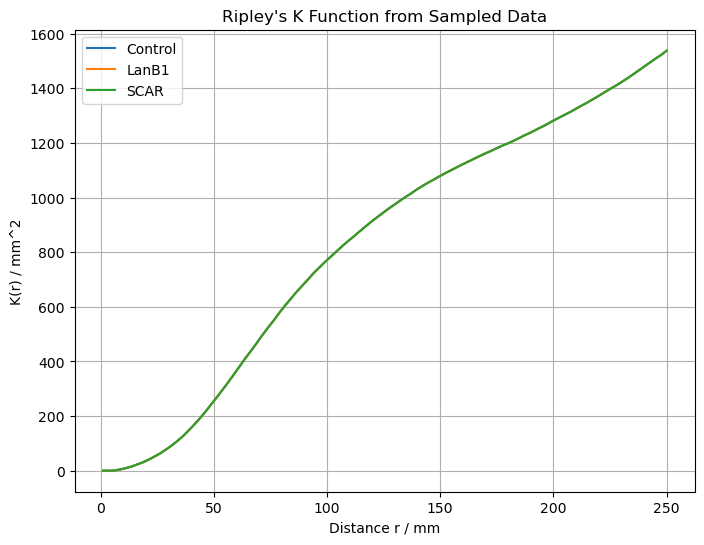

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# We'll use the 'Position X' and 'Position Y' as the coordinates for Ripley's K function

sample_coords = time_1_data[['Position X', 'Position Y', 'Position Z']].values
x_range = max(sample_coords[:, 0]) - min(sample_coords[:, 0])
y_range = max(sample_coords[:, 1]) - min(sample_coords[:, 1])
z_range = max(sample_coords[:, 2]) - min(sample_coords[:, 2])
print(x_range)
# Define the range of distances for which to calculate Ripley's K function
r_values = np.linspace(1, 250, 100)  # Adjusting the range of distances

# Calculate the distance matrix for the sampled points
dist_matrix = distance_matrix(sample_coords, sample_coords)

# Calculate Ripley's K function
K_values = []

for r in r_values:
    # Count the number of pairs within distance r (excluding self-pairs)
    K_r = np.sum(dist_matrix <= r) - len(sample_coords)
    # Normalize by the number of points and assume unit area
    K_r_normalized = K_r / (len(sample_coords)) ** 2
    K_values.append(K_r_normalized)

# Convert results to numpy array for easier manipulation
K_values = np.array(K_values)
K_values_control = K_values
K_values_LanB1 = K_values
K_values_SCAR = K_values

#Approximating the area by the product of range on all dimensions
area = np.sqrt(x_range * y_range * z_range)
plt.figure(figsize=(8, 6))
plt.plot(r_values, area * K_values_control, label="Control")
plt.plot(r_values, area * K_values_LanB1, label="LanB1")
plt.plot(r_values, area * K_values_SCAR, label="SCAR")
#plt.plot(r_values, np.pi * (r_values ** 2), label = "Homogenous Poisson Distribution", linestyle='dashed')
plt.xlabel("Distance r / mm")
plt.ylabel("K(r) / mm^2")

plt.title("Ripley's K Function from Sampled Data")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
print(sample_coords)

[[ 75.4568  29.3606   0.5   ]
 [ 86.5527  37.2136   0.5   ]
 [115.439   50.2596   0.5   ]
 ...
 [ 63.1278 372.834   70.5   ]
 [ 73.4478 392.586   70.5   ]
 [ 99.8347 412.024   70.5   ]]


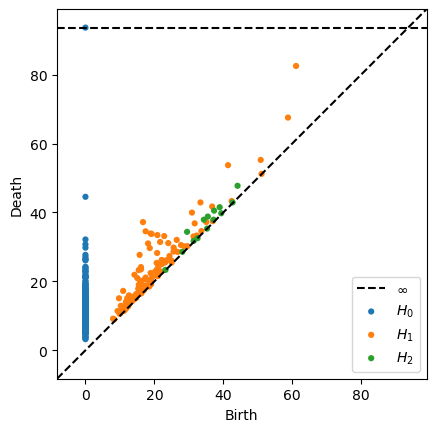

NameError: name 'diagrams_control' is not defined

In [11]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams


# Compute the Rips complex and persistent homology
diagrams = ripser(sample_coords, maxdim=2)['dgms']

#print(diagrams)
#diagrams_control_1 = diagrams
#diagrams_control_2 = diagrams
diagrams_control_3 = diagrams
#diagrams_SCAR = diagrams
diagrams_SCAR_399 = diagrams
# Plot the persistence diagrams
#plot_diagrams(diagrams_control_1, show=True)
#plot_diagrams(diagrams_control_2, show=True)
plot_diagrams(diagrams_control_3, show=True)
# Extract Betti numbers from the diagrams
#betti_0 = len([pt for pt in diagrams_control[0] if pt[1] == np.inf])
betti_1 = len(diagrams_control[1])
betti_2 = len(diagrams_control[2])

print(f"Betti 0: {betti_0}")
print(f"Betti 1: {betti_1}")
print(f"Betti 2: {betti_2}")


In [13]:
from ripser import ripser
from persim import wasserstein

# Assuming diagrams_control and diagrams_LanB1 are already computed
# Each should be a list of persistence diagrams (output of ripser)

# Example:
# diagrams_control = ripser(control_points)['dgms']
# diagrams_LanB1 = ripser(LanB1_points)['dgms']

# Compute the Wasserstein distance for H0 (Betti 0 features)


# Compute the Wasserstein distance for H1 (Betti 1 features)
wasserstein_H1 = wasserstein(diagrams_SCAR[1], diagrams_SCAR_399[1])


print(f"Wasserstein Distance for H1: {wasserstein_H1}")



NameError: name 'diagrams_SCAR' is not defined

In [14]:
from ripser import ripser
from persim import plot_diagrams

# Assume 'sample_coords' is your coordinate data
result = ripser(sample_coords, maxdim=2)

# Retrieve persistence diagrams
diagrams = result['dgms']

# For example, to find the radius for the first Betti 1 (loop):
first_loop_birth = diagrams[1][0, 0]
first_loop_death = diagrams[1][0, 1]

print(f"First loop appears at radius: {first_loop_birth}")
print(f"First loop disappears at radius: {first_loop_death}")


First loop appears at radius: 61.111328125
First loop disappears at radius: 82.5018539428711


MovieWriter imagemagick unavailable; using Pillow instead.


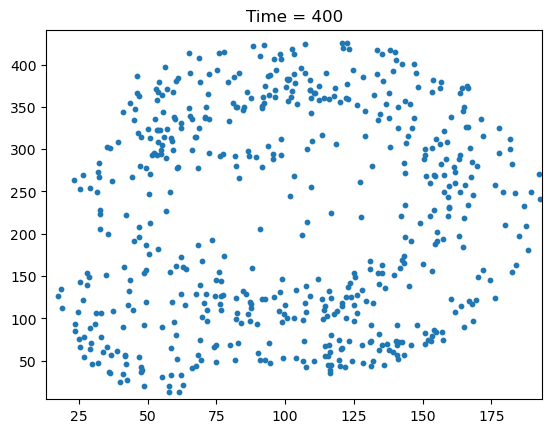

In [15]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Filter data to include only times from 1 to 400
filtered_data = data[(data['Time'] >= 1) & (data['Time'] <= 400)]

# Set up the figure, axis, and plot element
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=10)

# Initialize function for the animation
def init():
    ax.set_xlim(filtered_data['Position X'].min(), filtered_data['Position X'].max())
    ax.set_ylim(filtered_data['Position Y'].min(), filtered_data['Position Y'].max())
    return scat,

# Update function for each frame in the animation
def update(frame):
    current_data = filtered_data[filtered_data['Time'] == frame]
    scat.set_offsets(current_data[['Position X', 'Position Y']].values)
    ax.set_title(f'Time = {frame}')
    return scat,

# Create the animation without blitting
ani = animation.FuncAnimation(fig, update, frames=range(1, 401), init_func=init, blit=False, repeat=False)

# Save or show the animation
ani.save('data_animation.gif', writer='imagemagick', fps=10)  # Saves as a gif file
# ani.save('data_animation.mp4', writer='ffmpeg', fps=10)  # Alternatively, save as mp4 if ffmpeg is installed
plt.show()


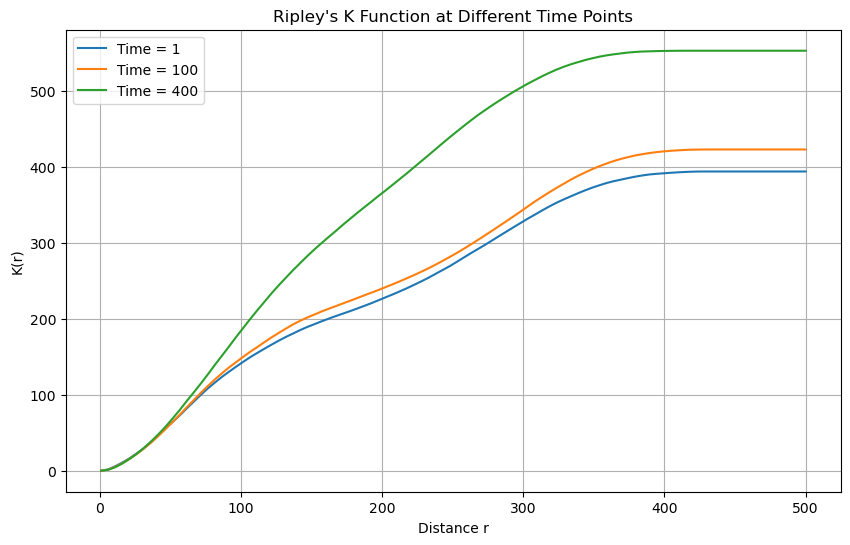

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def compute_ripleys_k(coords, r_values):
    """Computes Ripley's K function for given coordinates and r values."""
    dist_matrix = distance_matrix(coords, coords)
    K_values = []

    for r in r_values:
        K_r = np.sum(dist_matrix <= r) - len(coords)  # Exclude self-pairs
        K_r_normalized = K_r / len(coords)  # Normalize by number of points
        K_values.append(K_r_normalized)

    return np.array(K_values)

def plot_ripleys_k(data, r_values, times):
    """Plots Ripley's K function for specified times."""
    plt.figure(figsize=(10, 6))

    for time in times:
        # Filter the data for the given time
        time_data = data[data['Time'] == time]
        coords = time_data[['Position X', 'Position Y']].values

        # Compute Ripley's K function
        K_values = compute_ripleys_k(coords, r_values)

        # Plot the Ripley's K function
        plt.plot(r_values, K_values, label=f'Time = {time}')

    # Plot the expected K(r) under CSR (πr^2)
    expected_K = np.pi * r_values**2

    # Labels and title
    plt.xlabel("Distance r")
    plt.ylabel("K(r)")
    plt.title("Ripley's K Function at Different Time Points")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Load the dataset


# Define the range of distances
r_values = np.linspace(1, 500, 100)

# Define the times of interest
times_of_interest = [1, 100, 400]

# Plot Ripley's K function for the specified times
plot_ripleys_k(data, r_values, times_of_interest)


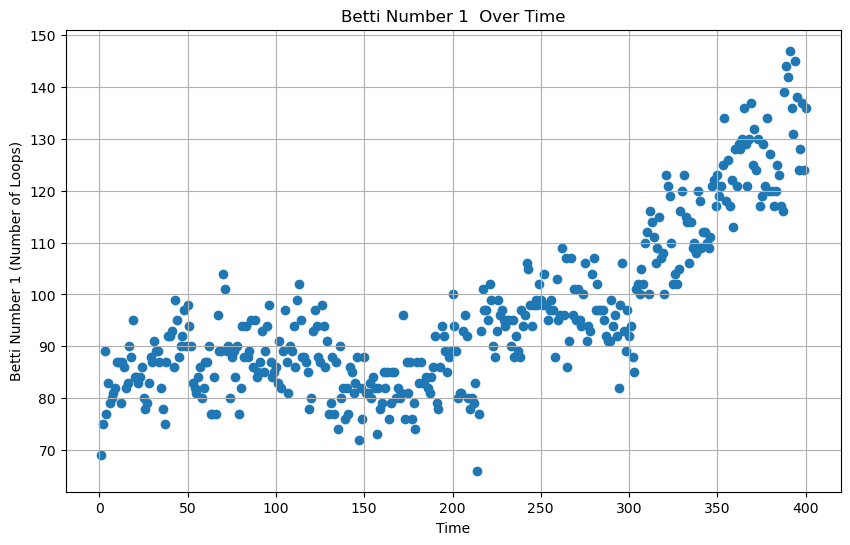

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

def compute_betti_1(data, times):
    """Computes Betti 1 number for each time point in the given list of times."""
    betti_1_values = []

    for time in times:
        # Filter the data for the given time
        time_data = data[data['Time'] == time]
        coords = time_data[['Position X', 'Position Y']].values

        # Compute the persistent homology
        diagrams = ripser(coords, maxdim=1)['dgms']

        # Betti 1 is the number of points in the H1 (1D holes) persistence diagram
        betti_1 = len(diagrams[1])  # Count the number of 1D loops (Betti 1)
        betti_1_values.append(betti_1)

    return betti_1_values

def plot_betti_1_over_time(data, start_time, end_time):
    """Plots Betti 1 number over time from start_time to end_time."""
    times = range(start_time, end_time + 1)

    # Compute Betti 1 values over the specified time range
    betti_1_values = compute_betti_1(data, times)
    betti_1_values_SCAR = betti_1_values

    # Plot the Betti 1 values over time
    plt.figure(figsize=(10, 6))
    plt.scatter(times, betti_1_values_SCAR, marker='o')
    plt.xlabel("Time")
    plt.ylabel("Betti Number 1 (Number of Loops)")
    plt.title("Betti Number 1  Over Time")
    plt.grid(True)
    plt.show()

# Plot Betti 1 number from time 1 to 400
plot_betti_1_over_time(data, start_time=1, end_time=400)


In [30]:
print(len(compute_betti_1(data, range(1, 400))))

399


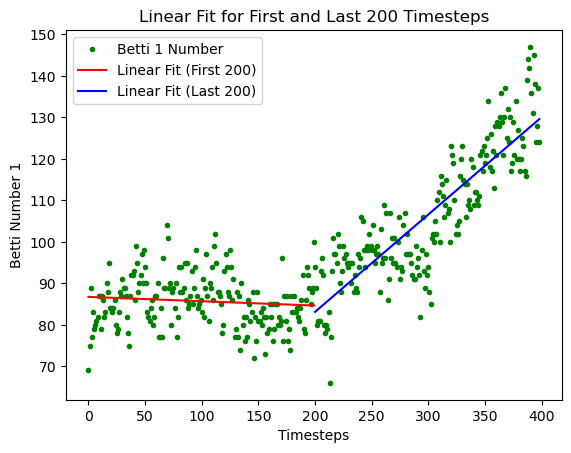

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
Betti_1 = compute_betti_1(data, range(1, 400))
# Sample data for Betti 1 number over 400 timesteps
timesteps = np.arange(399)


# Fit a line to the first 200 timesteps
fit_first_200 = np.polyfit(timesteps[:200], Betti_1[:200], 1)
linear_fit_first_200 = np.polyval(fit_first_200, timesteps[:200])

# Fit a line to the last 200 timesteps
fit_last_200 = np.polyfit(timesteps[200:], Betti_1[200:], 1)
linear_fit_last_200 = np.polyval(fit_last_200, timesteps[200:])

# Plot the Betti_1 number
plt.plot(timesteps, Betti_1, 'o', color='green', markersize=3, label='Betti 1 Number')

# Plot the linear fit for the first 200 timesteps
plt.plot(timesteps[:200], linear_fit_first_200, color='red', label='Linear Fit (First 200)')

# Plot the linear fit for the last 200 timesteps
plt.plot(timesteps[200:], linear_fit_last_200, color='blue', label='Linear Fit (Last 200)')

# Adding labels and legend
plt.xlabel('Timesteps')
plt.ylabel('Betti Number 1')
plt.title('Linear Fit for First and Last 200 Timesteps')
plt.legend()
plt.show()


In [32]:
linear_fit_last_200

array([ 83.12984925,  83.36461702,  83.5993848 ,  83.83415258,
        84.06892036,  84.30368814,  84.53845592,  84.77322369,
        85.00799147,  85.24275925,  85.47752703,  85.71229481,
        85.94706259,  86.18183036,  86.41659814,  86.65136592,
        86.8861337 ,  87.12090148,  87.35566926,  87.59043703,
        87.82520481,  88.05997259,  88.29474037,  88.52950815,
        88.76427593,  88.9990437 ,  89.23381148,  89.46857926,
        89.70334704,  89.93811482,  90.17288259,  90.40765037,
        90.64241815,  90.87718593,  91.11195371,  91.34672149,
        91.58148926,  91.81625704,  92.05102482,  92.2857926 ,
        92.52056038,  92.75532816,  92.99009593,  93.22486371,
        93.45963149,  93.69439927,  93.92916705,  94.16393483,
        94.3987026 ,  94.63347038,  94.86823816,  95.10300594,
        95.33777372,  95.5725415 ,  95.80730927,  96.04207705,
        96.27684483,  96.51161261,  96.74638039,  96.98114817,
        97.21591594,  97.45068372,  97.6854515 ,  97.92

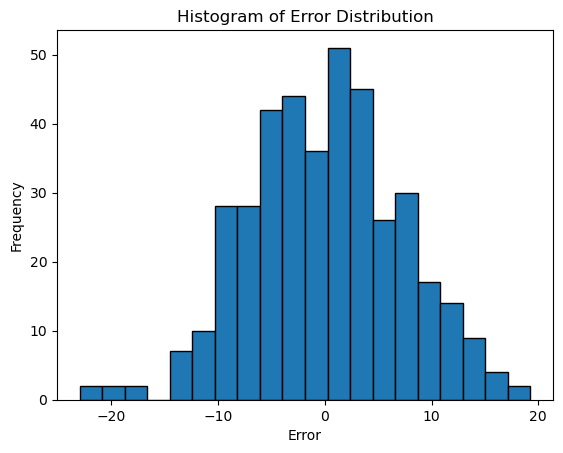

In [33]:
# Calculate the error (difference) for the first and last 200 timesteps
error_first_200 = Betti_1[:200] - linear_fit_first_200
error_last_200 = Betti_1[200:] - linear_fit_last_200

# Combine the errors for a full error distribution
total_error = np.concatenate([error_first_200, error_last_200])

# Plot histogram of the error distribution
plt.hist(total_error, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error Distribution')
plt.show()


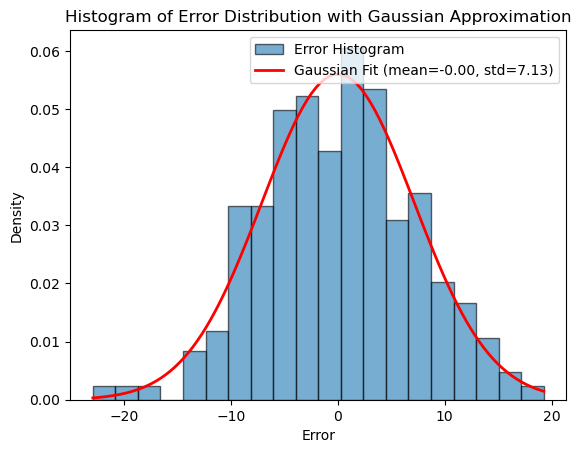

In [34]:
from scipy.stats import norm
mean_error = np.mean(total_error)
std_dev_error = np.std(total_error)

# Plot histogram of the error distribution
plt.hist(total_error, bins=20, density=True, edgecolor='black', alpha=0.6, label='Error Histogram')

# Define a Gaussian distribution using the mean and std deviation
x = np.linspace(min(total_error), max(total_error), 100)
gaussian_approximation = norm.pdf(x, mean_error, std_dev_error)

# Plot the Gaussian distribution
plt.plot(x, gaussian_approximation, color='red', linewidth=2, label=f'Gaussian Fit (mean={mean_error:.2f}, std={std_dev_error:.2f})')

# Adding labels and legend
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Histogram of Error Distribution with Gaussian Approximation')
plt.legend()
plt.show()


In [35]:

from ripser import ripser
from persim import plot_diagrams

def plot_barcode(data, time):
    """Plots the barcode of the system at a specific time t."""
    # Filter the data for the given time
    time_data = data[data['Time'] == time]
    coords = time_data[['Position X', 'Position Y']].values

    # Compute the persistent homology
    diagrams = ripser(coords, maxdim=2)['dgms']

    # Plot the barcode
    plt.figure(figsize=(10, 6))
    plot_diagrams(diagrams, show=True)
    plt.title(f"Barcode Diagram at Time = {time}")
    plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[61.11132812 82.50185394]
 [58.77242279 67.5377121 ]
 [51.09860992 51.19126892]
 [50.85873032 55.24462891]
 [42.42773438 43.32284546]
 [41.37436295 53.72268295]
 [36.95906067 37.48545074]
 [36.77103806 41.73537827]
 [35.06322098 37.22730637]
 [33.64794159 34.59919739]
 [33.37016678 42.90513611]
 [32.28572845 33.30339432]
 [31.69568443 36.83150101]
 [31.34791183 33.02692795]
 [30.90751839 39.96151352]
 [29.5699501  30.20900154]
 [28.73898315 30.15574837]
 [27.74375534 30.53930092]
 [26.74048424 28.56381226]
 [26.48711586 32.0348587 ]
 [25.84759521 28.9156208 ]
 [25.58114052 29.81840897]
 [25.54327774 28.65814018]
 [25.01200485 25.45889091]
 [24.95413589 26.0441227 ]
 [24.37711143 27.35602379]
 [24.1991787  26.32405281]
 [24.03300858 31.10558701]
 [23.40400887 26.09081459]
 [23.18376923 25.62305069]
 [23.01040649 25.48604393]
 [22.85297966 33.14086533]
 [22.20387077 25.05935097]
 [22.11005211 26.21278763]
 [22.06243515 22.8300724 ]
 [21.66391182 31.43402481]
 [21.37988853 24.68376923]
 

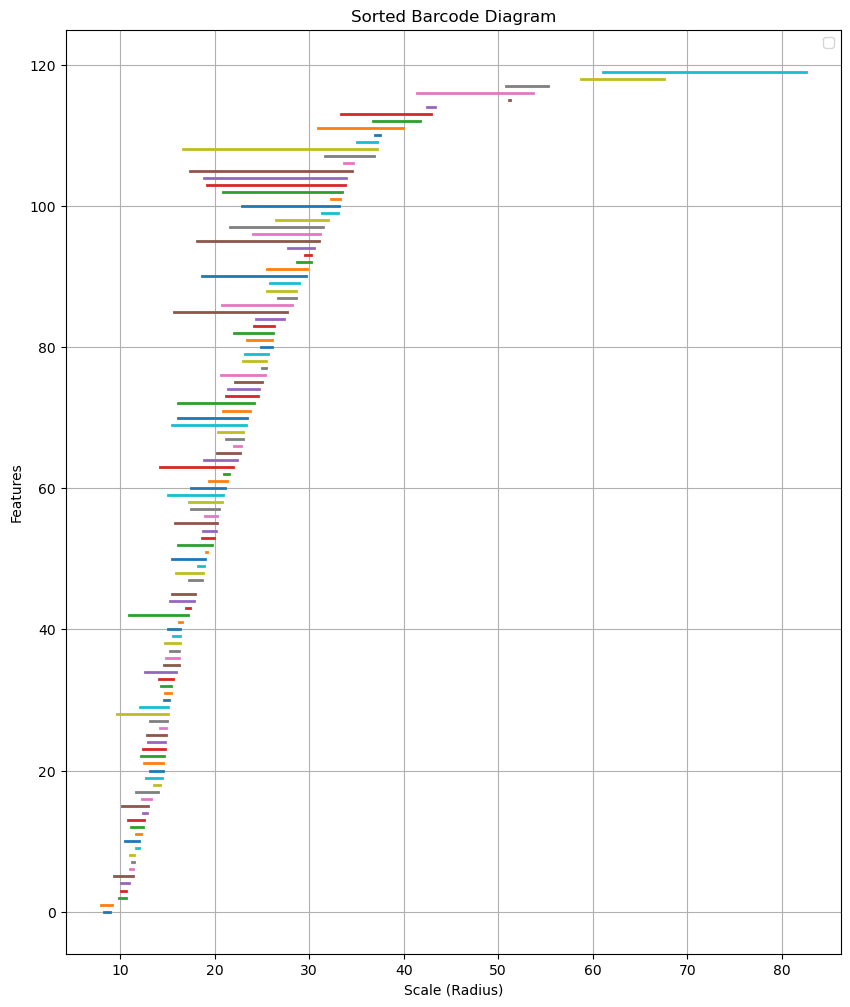

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

def plot_sorted_barcode(diagrams):
    """Plots the barcode with features sorted by their birth times."""
    # Extract birth and death times for all dimensions (H0, H1, H2, etc.)
    all_bars = []
    for bar in enumerate(diagrams):
        
        
        birth = bar[1][0]
        print(birth)
        death = bar[1][1]
        # Only consider finite death times for barcodes
        if np.isfinite(death):
            all_bars.append((birth, death))
    
    # Sort bars by birth time (second element in tuple)
    all_bars_sorted = sorted(all_bars, key=lambda x: x[1])

    # Print sorted birth and death times
    for i, (birth, death) in enumerate(all_bars_sorted):
        print(f"Feature {i+1}: Birth = {birth:.2f}, Death = {death:.2f}")
    
    # Generate the barcode plot
    plt.figure(figsize=(10, len(all_bars_sorted) / 10))
    for i, (birth, death) in enumerate(all_bars_sorted):
        plt.plot([birth, death], [i, i], lw=2)

    plt.xlabel('Scale (Radius)')
    plt.ylabel('Features')
    plt.title('Sorted Barcode Diagram')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you've already computed the persistence diagrams using ripser
# Example: diagrams = ripser(coords, maxdim=2)['dgms']

# Generate some sample data (or use your own diagrams)
print(diagrams[1])
# Plot sorted barcode
plot_sorted_barcode(diagrams[1])


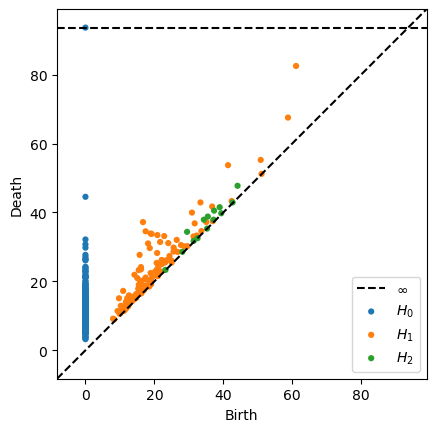

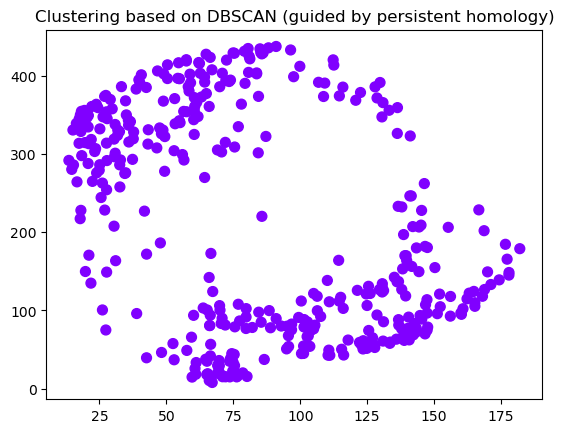

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from sklearn.cluster import DBSCAN

# Generate some sample data (or use your own data)
'''
np.random.seed(0)
data = np.concatenate([
    np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[7, 7], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[2, 7], scale=0.3, size=(100, 2)),
])
'''
# Step 1: Compute persistent homology
diagrams = ripser(sample_coords, maxdim=2)['dgms']

# Step 2: Visualize the persistence diagram for H0 (connected components)
from persim import plot_diagrams
plot_diagrams(diagrams, show=True)

# Step 3: Apply DBSCAN using the appropriate radius (based on persistent homology insight)
dbscan = DBSCAN(eps=5, min_samples=20)

labels = dbscan.fit_predict(sample_coords)

# Step 4: Plot the clustered data
plt.scatter(sample_coords[:, 0], sample_coords[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Clustering based on DBSCAN (guided by persistent homology)")
plt.show()


In [38]:

import pickle

# Load the variable
with open('my_variable.pkl', 'rb') as f:
    diagrams_sim = pickle.load(f)

print(diagrams_sim)


[array([[ 0.        ,  3.12151265],
       [ 0.        ,  4.32182074],
       [ 0.        ,  4.47430563],
       [ 0.        ,  5.0949893 ],
       [ 0.        ,  5.3890729 ],
       [ 0.        ,  5.45025444],
       [ 0.        ,  5.62802935],
       [ 0.        ,  5.81059456],
       [ 0.        ,  6.20495081],
       [ 0.        ,  6.38708591],
       [ 0.        ,  6.41742039],
       [ 0.        ,  6.70246124],
       [ 0.        ,  6.94692945],
       [ 0.        ,  6.95453262],
       [ 0.        ,  6.97620773],
       [ 0.        ,  7.02975368],
       [ 0.        ,  7.48892355],
       [ 0.        ,  7.99037218],
       [ 0.        ,  8.11508274],
       [ 0.        ,  8.20507336],
       [ 0.        ,  8.42639637],
       [ 0.        ,  8.48489952],
       [ 0.        ,  8.51468563],
       [ 0.        ,  8.76302433],
       [ 0.        ,  8.83860397],
       [ 0.        ,  8.90990067],
       [ 0.        ,  9.02520561],
       [ 0.        ,  9.13027382],
       [ 0.        

In [39]:
from ripser import ripser
from persim import wasserstein

# Assuming diagrams_control and diagrams_LanB1 are already computed using ripser
# Example:
# diagrams_control = ripser(control_points)['dgms']
# diagrams_LanB1 = ripser(LanB1_points)['dgms']

# Compute the Wasserstein distance for H0 (Betti 0 features)
wasserstein_H0 = wasserstein(diagrams_sim[0], diagrams_LanB1[0])

# Compute the Wasserstein distance for H1 (Betti 1 features)
wasserstein_H1 = wasserstein(diagrams_sim[1], diagrams_LanB1[1])

# Output the results
print(f"Wasserstein Distance for H0 (Connected Components): {wasserstein_H0}")
print(f"Wasserstein Distance for H1 (Loops): {wasserstein_H1}")


NameError: name 'diagrams_LanB1' is not defined

(554, 7)


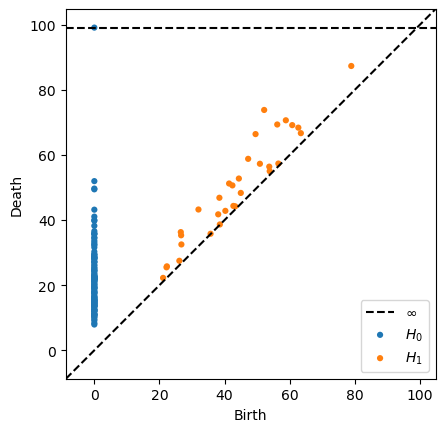

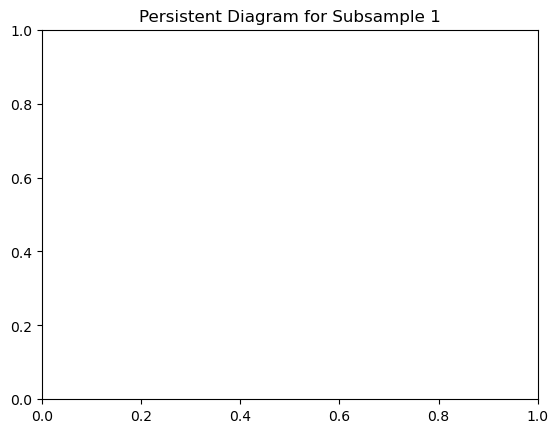

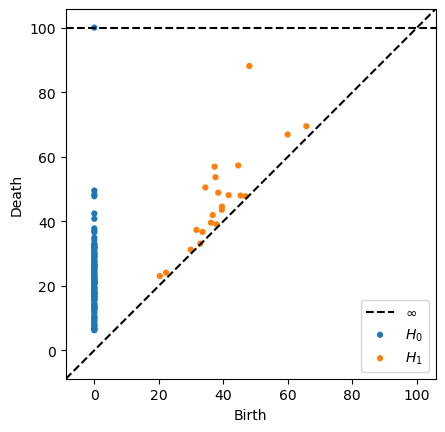

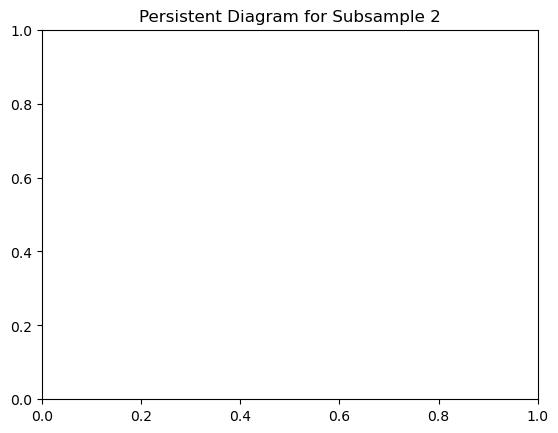

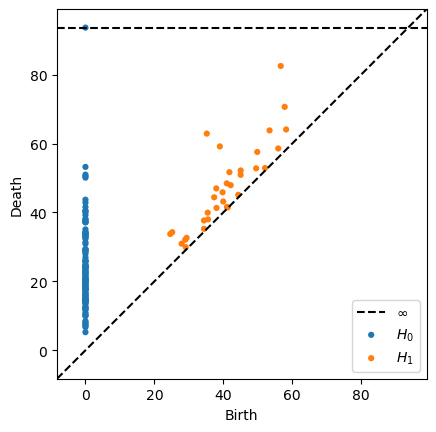

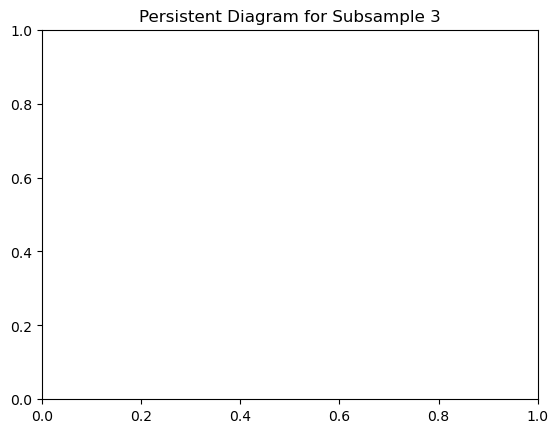

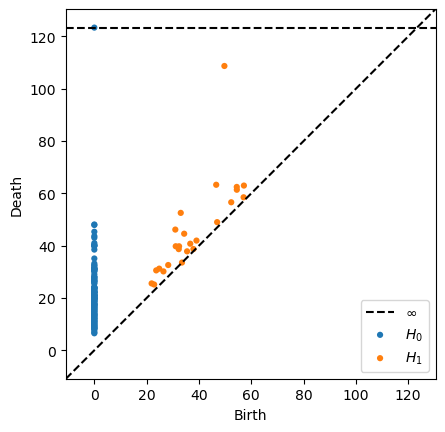

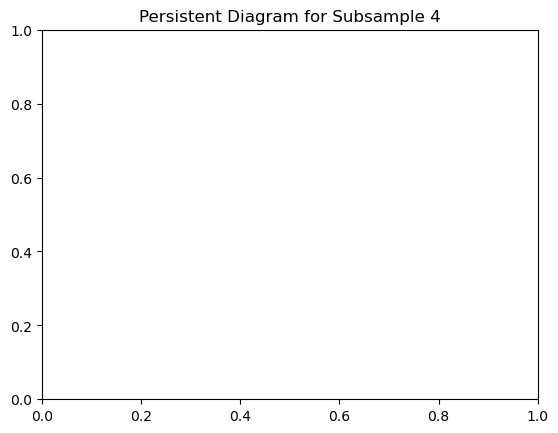

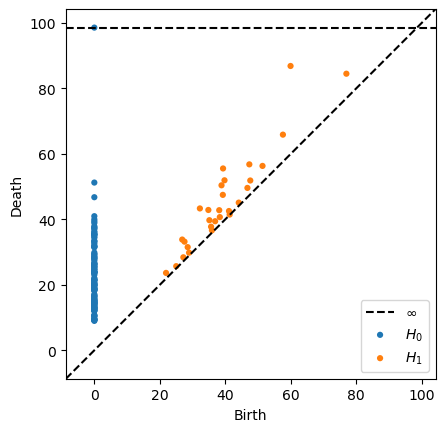

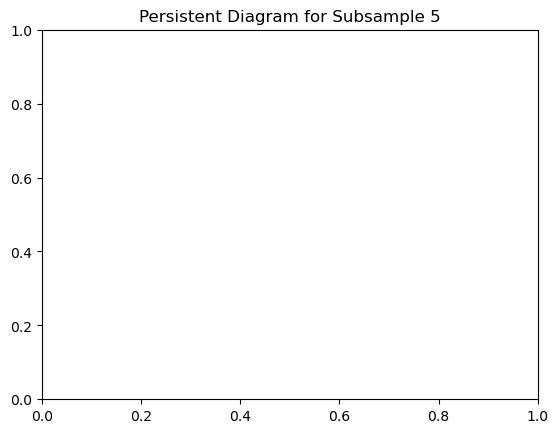

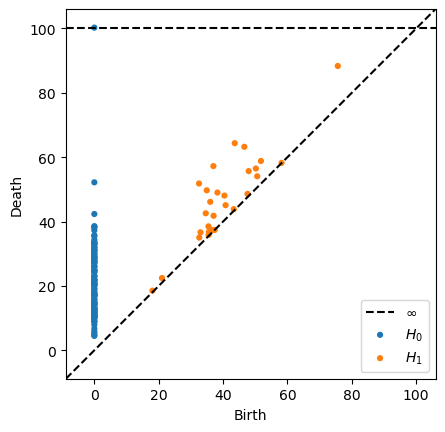

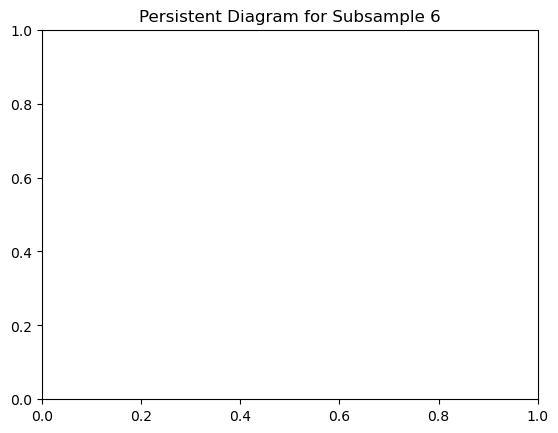

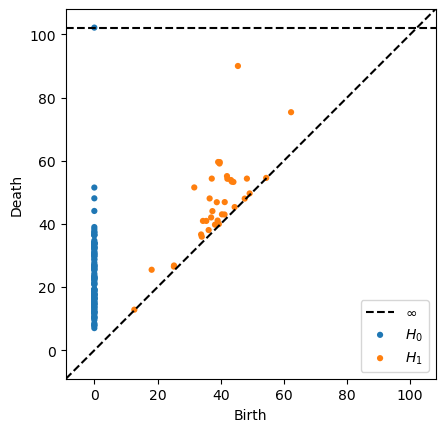

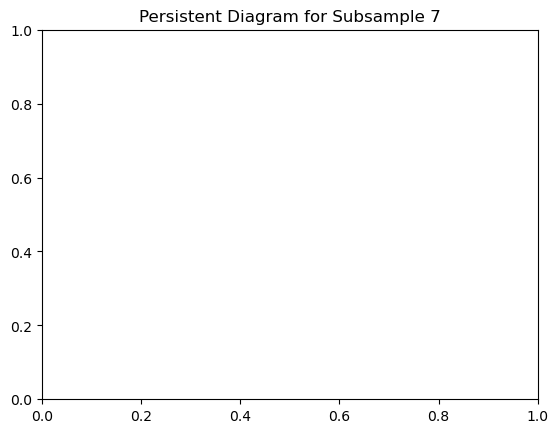

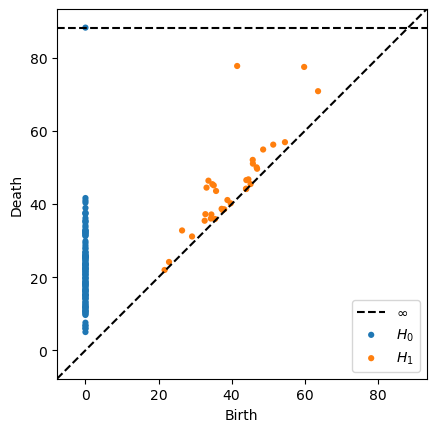

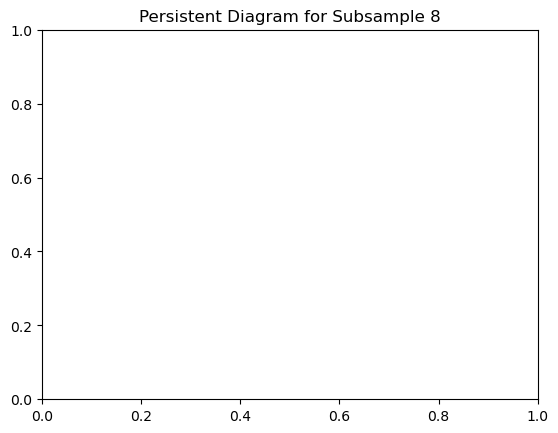

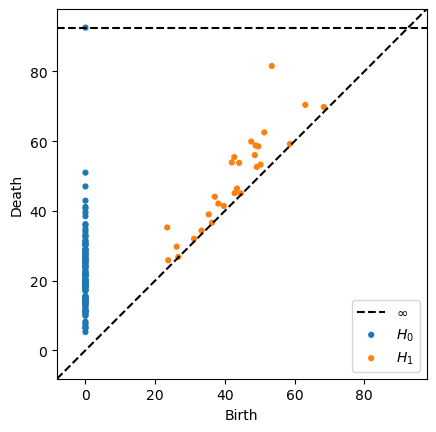

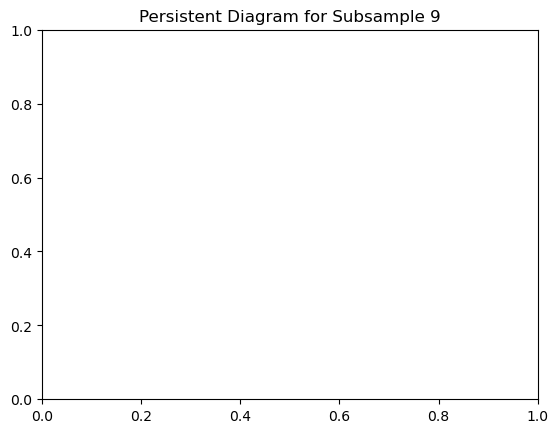

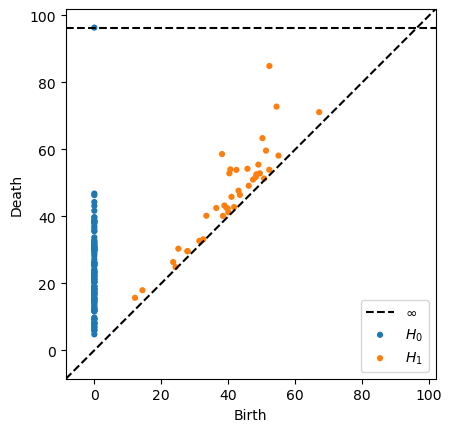

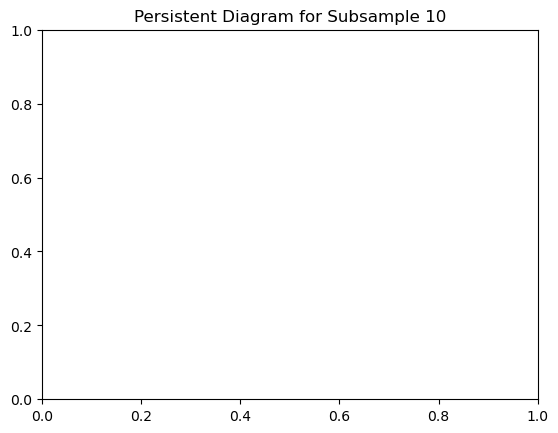

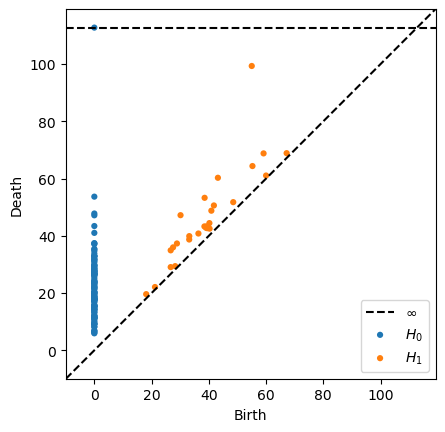

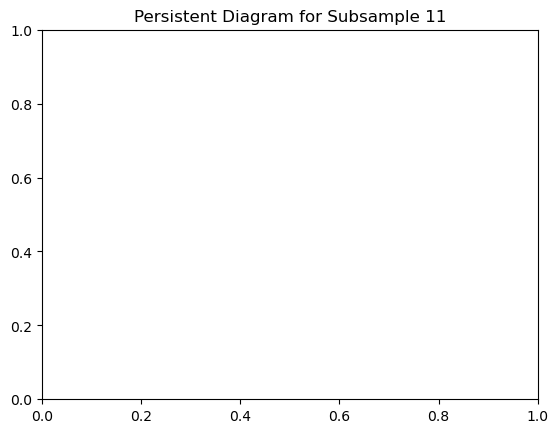

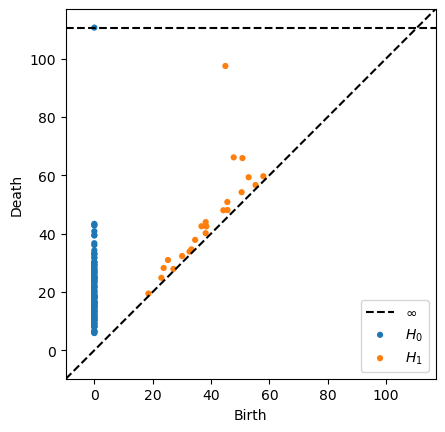

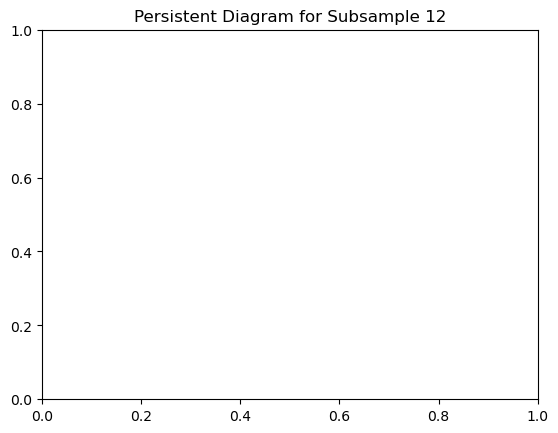

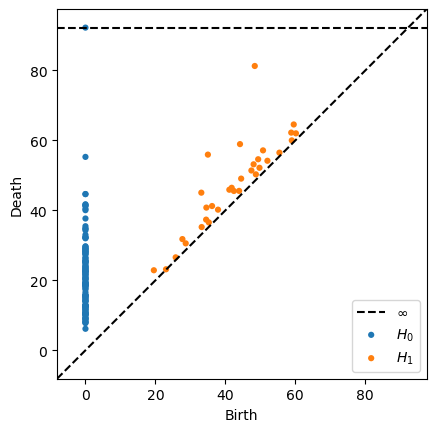

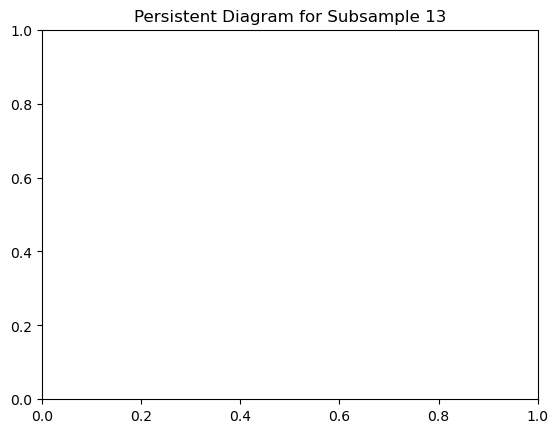

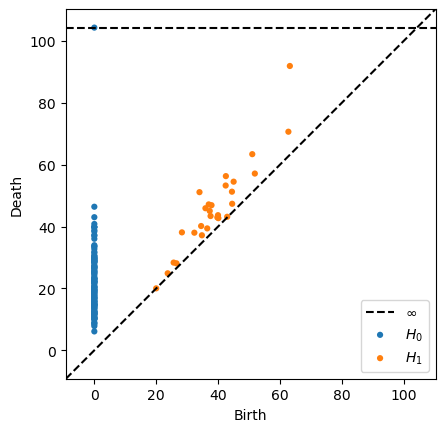

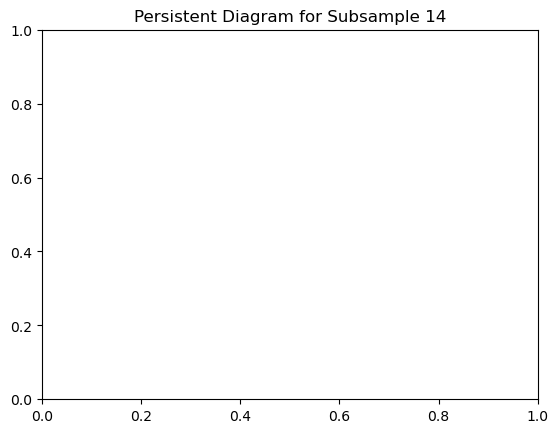

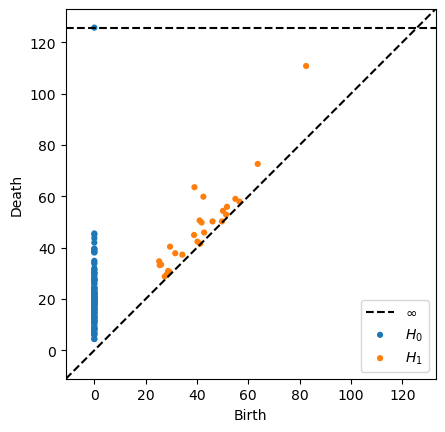

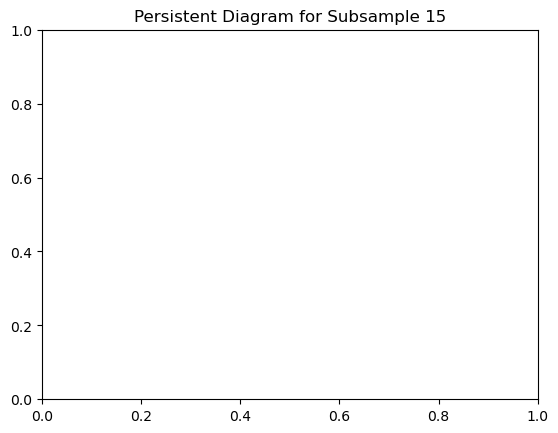

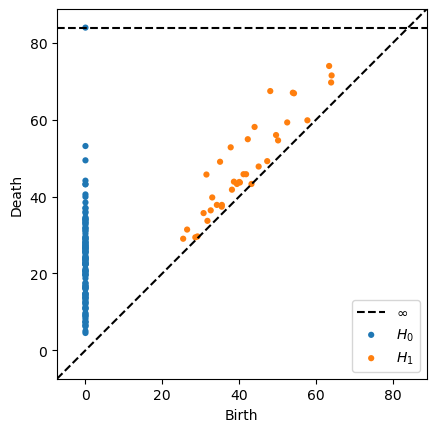

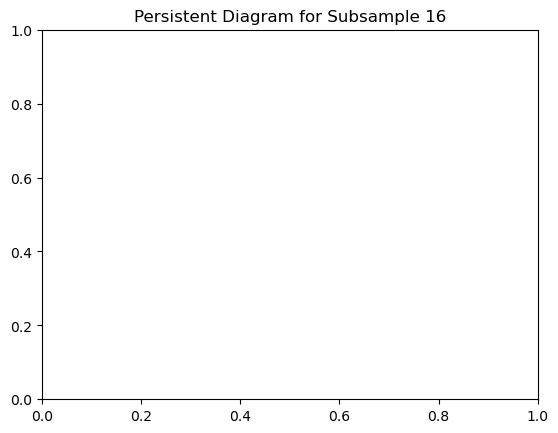

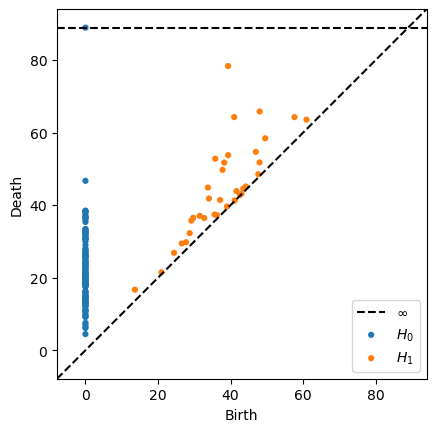

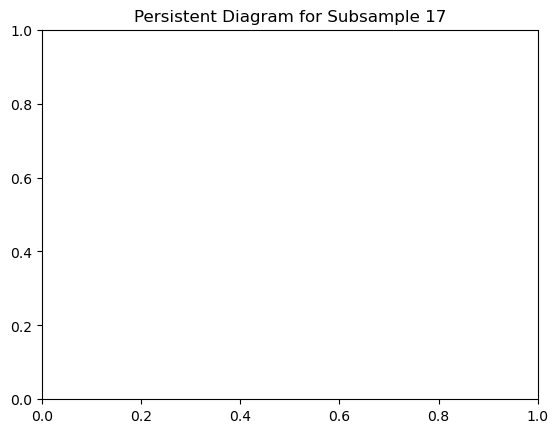

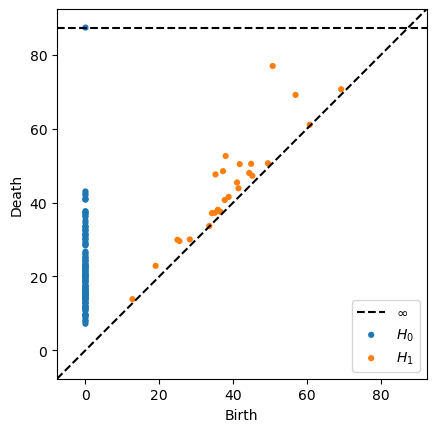

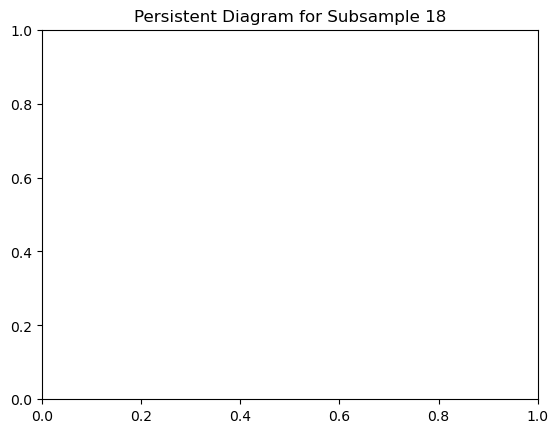

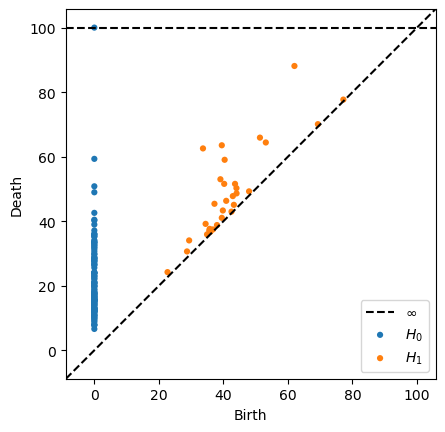

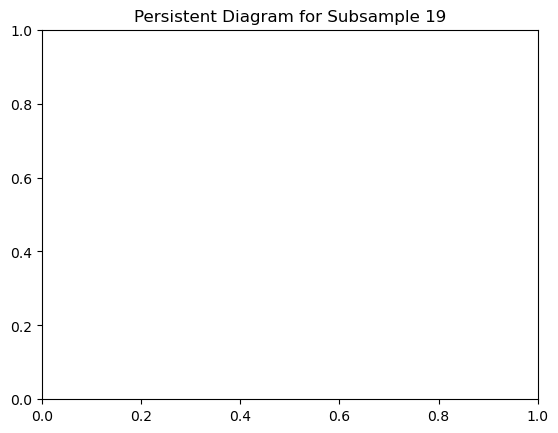

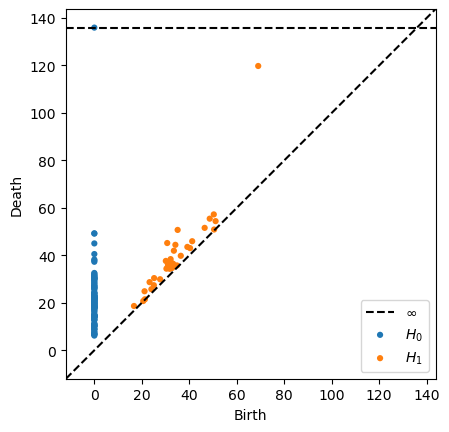

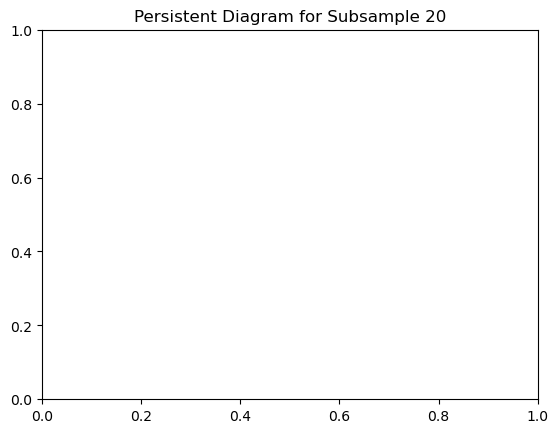

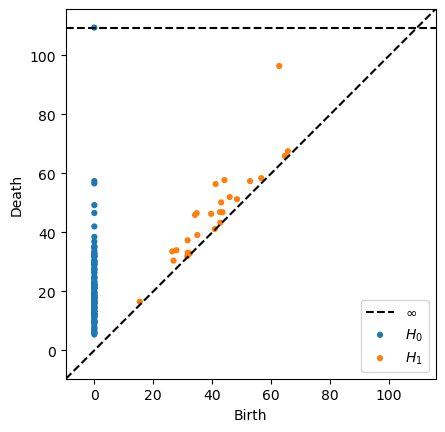

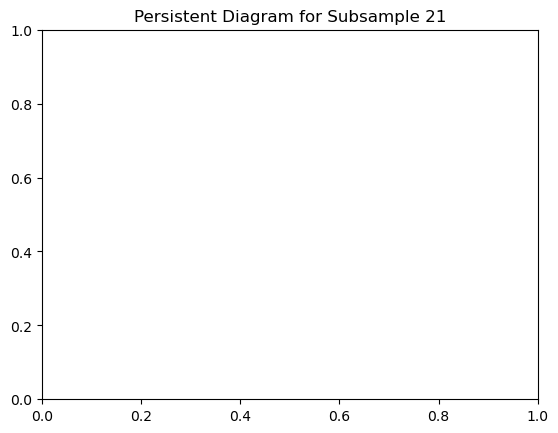

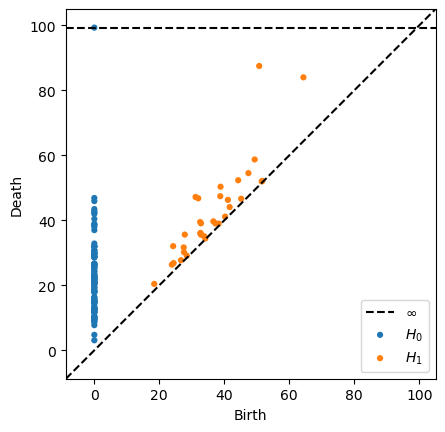

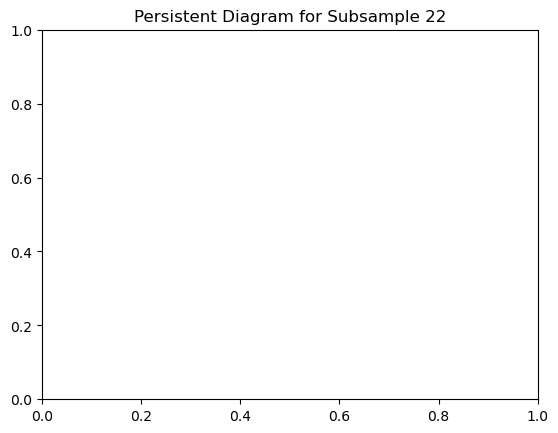

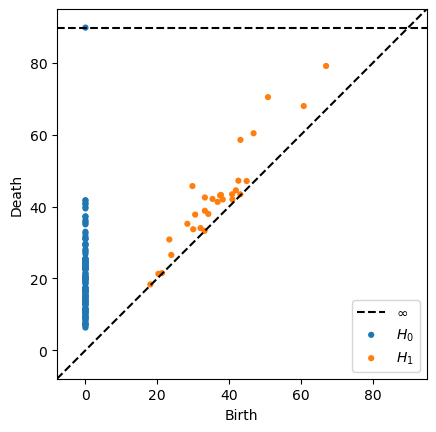

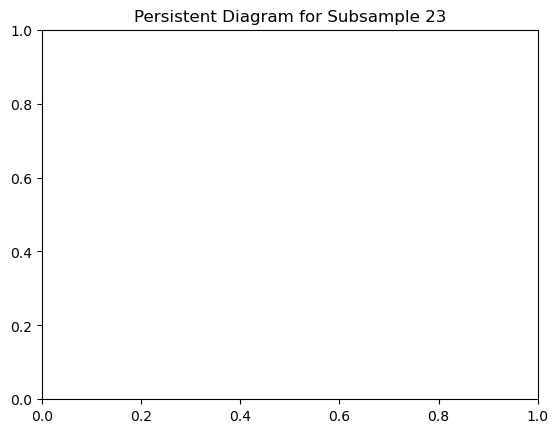

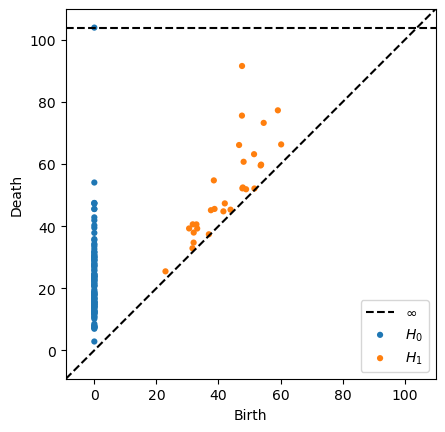

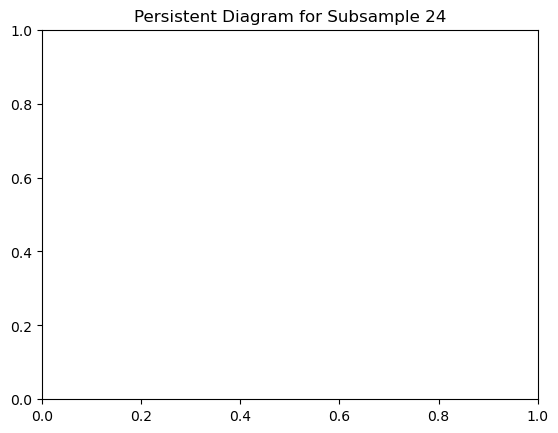

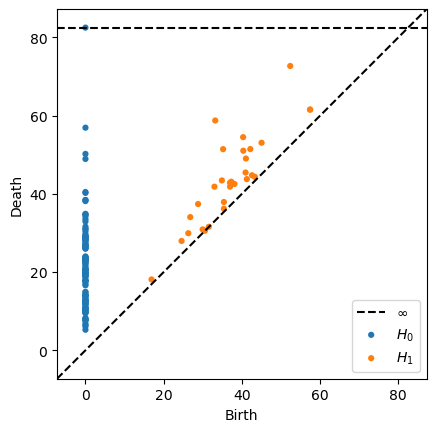

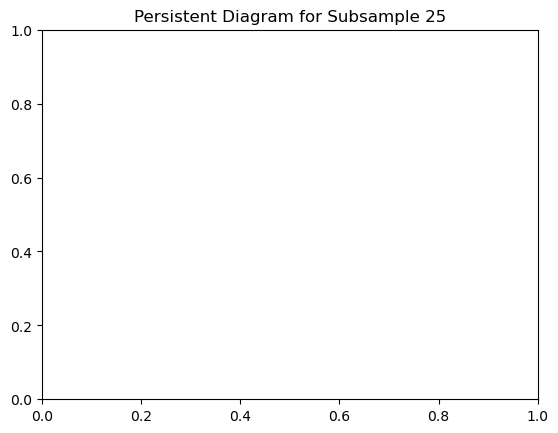

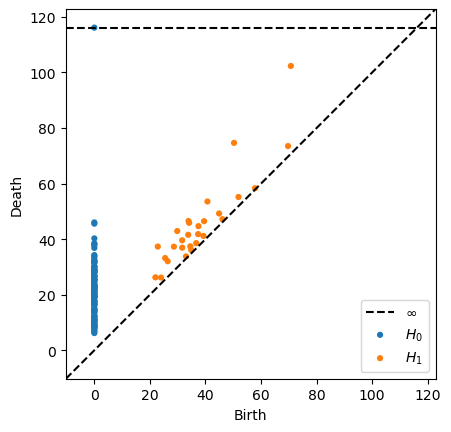

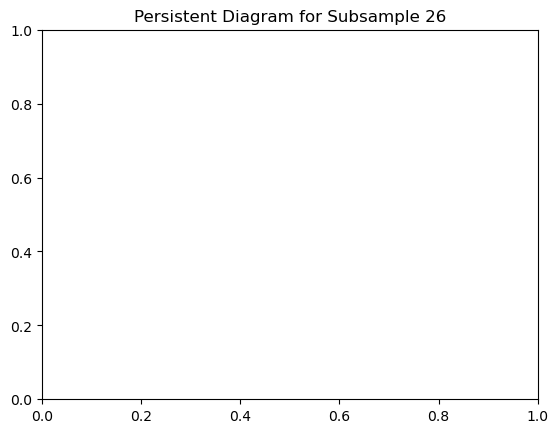

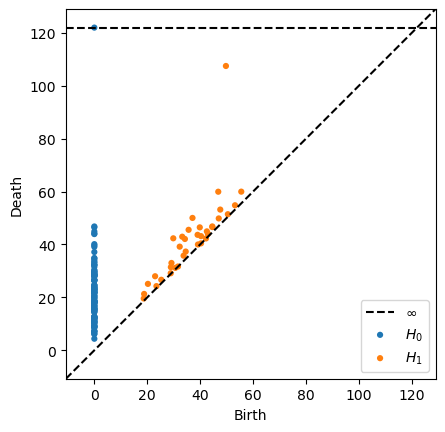

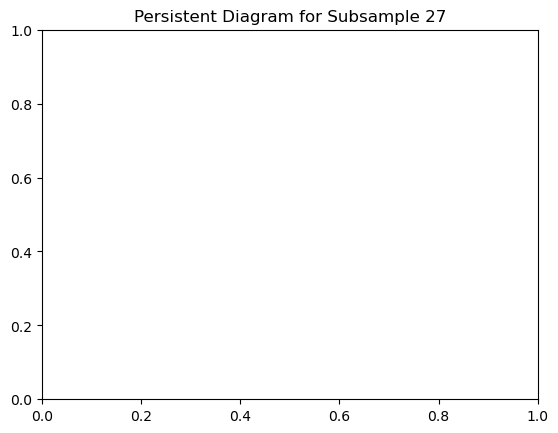

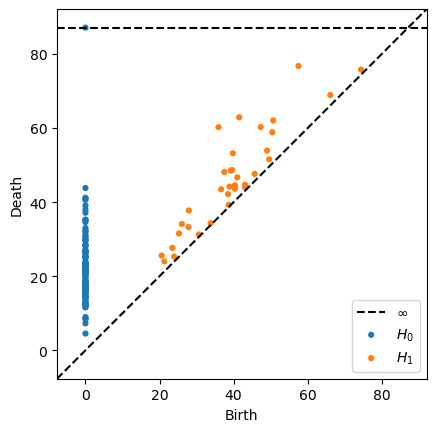

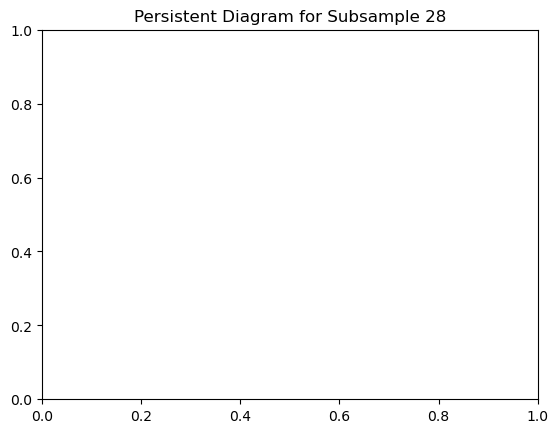

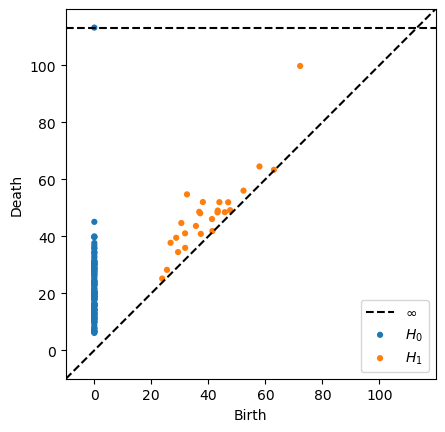

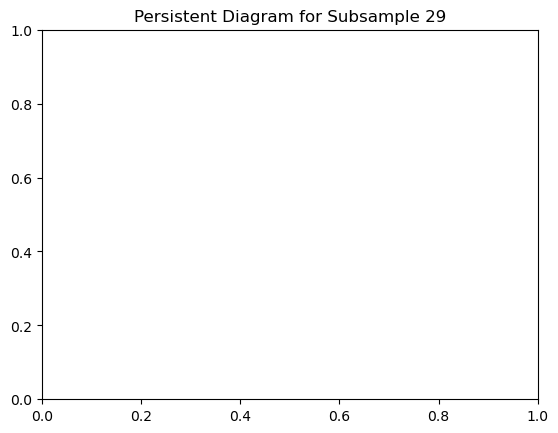

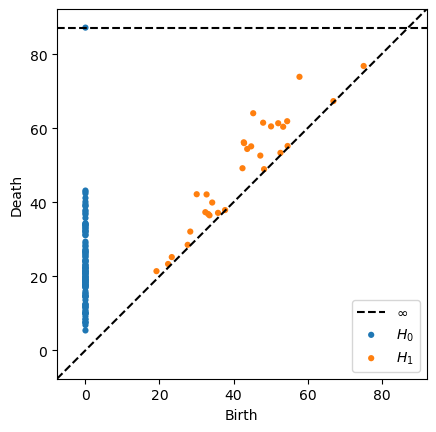

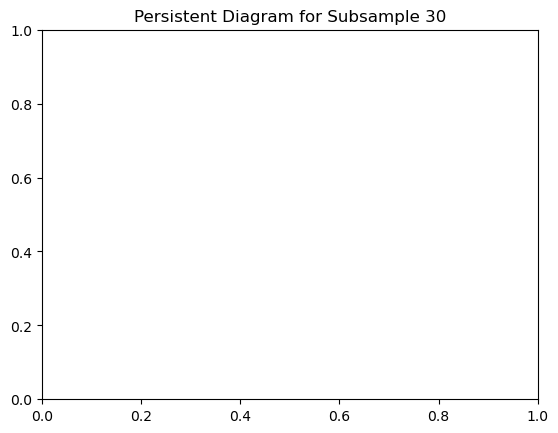

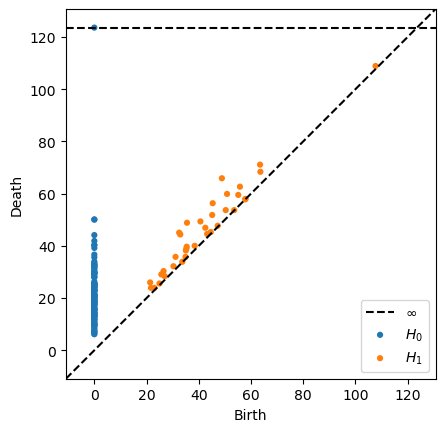

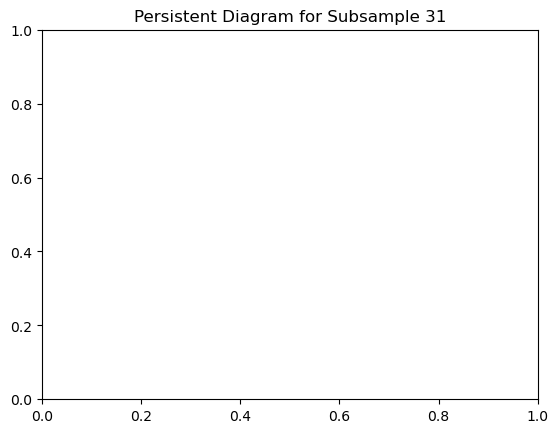

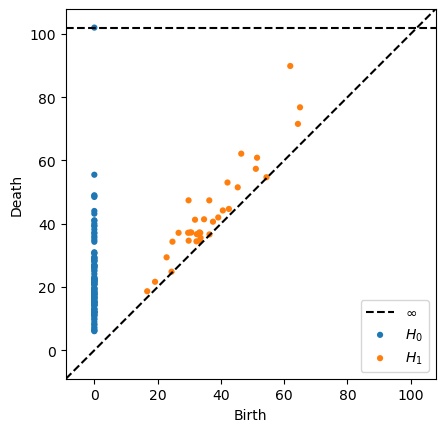

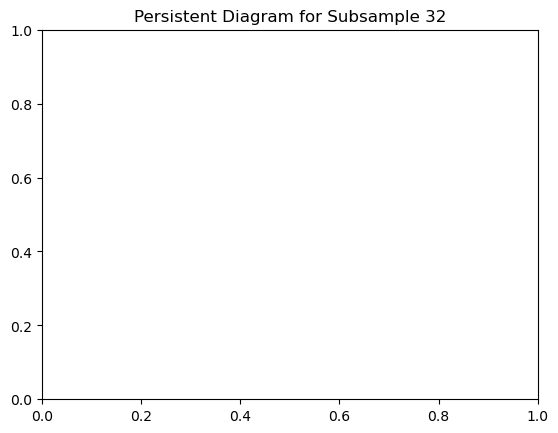

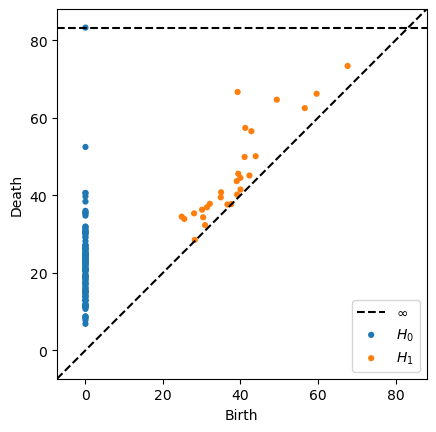

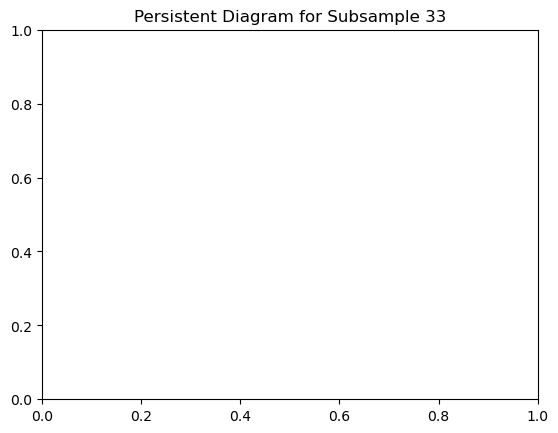

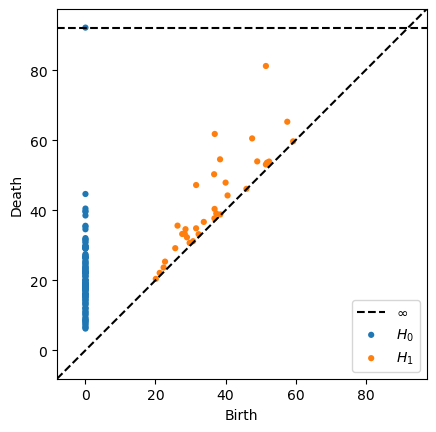

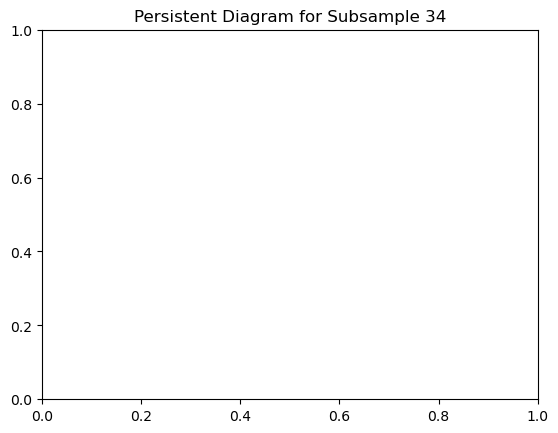

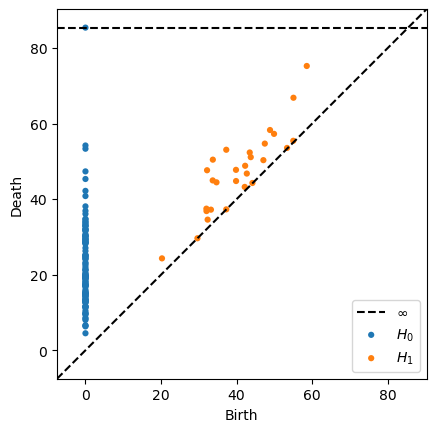

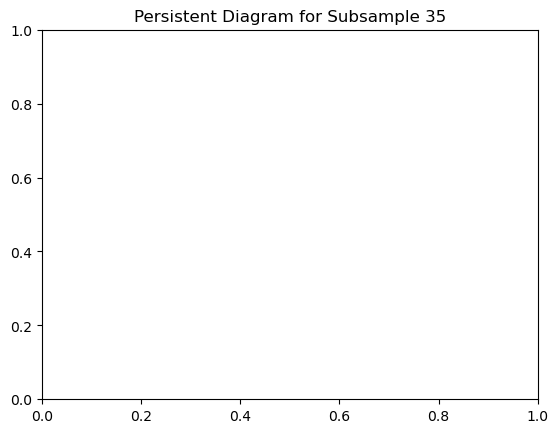

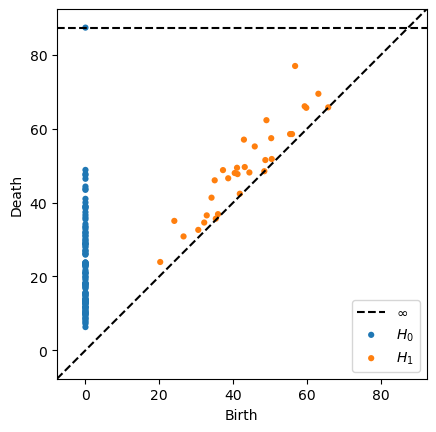

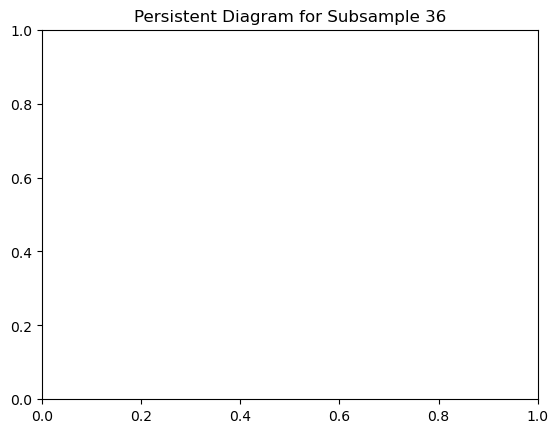

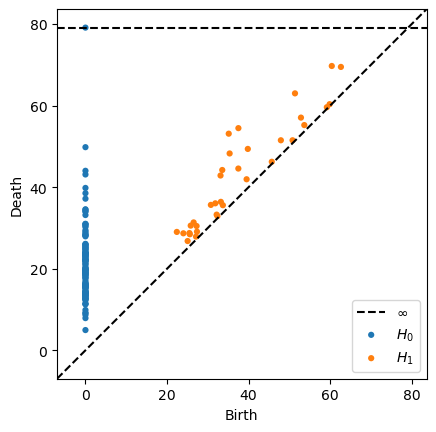

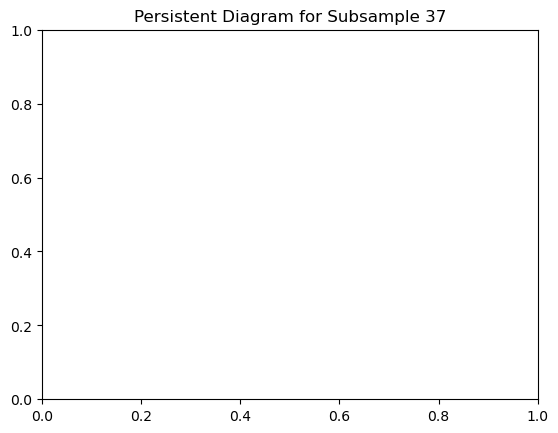

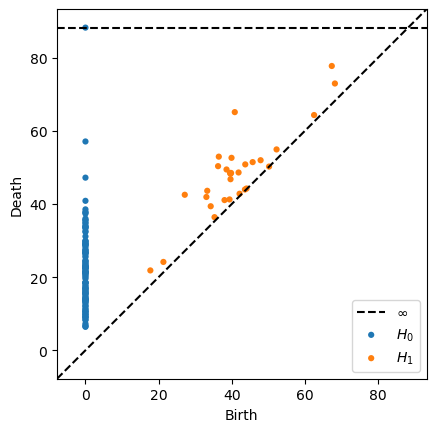

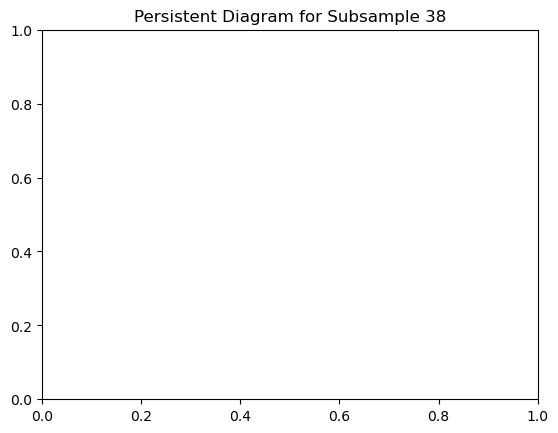

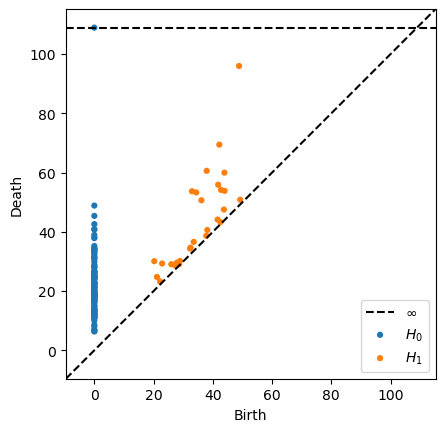

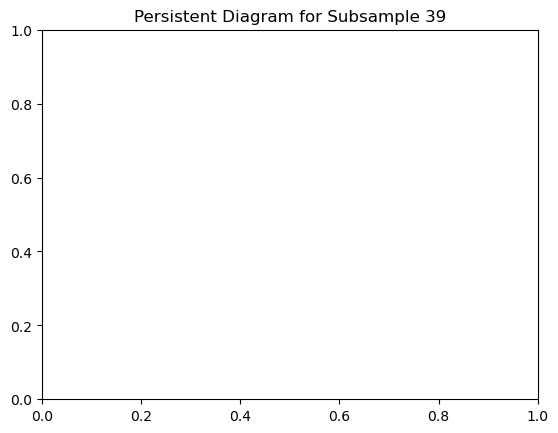

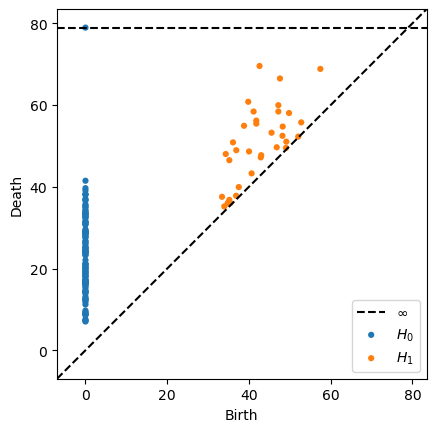

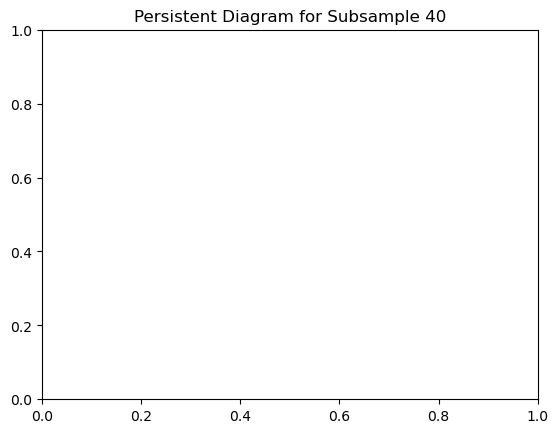

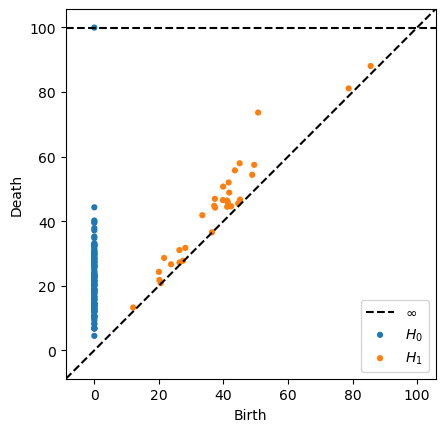

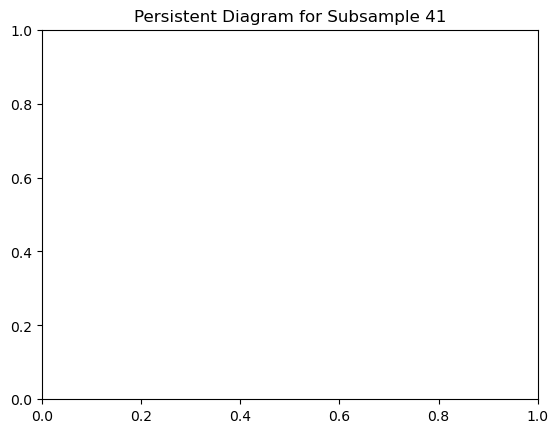

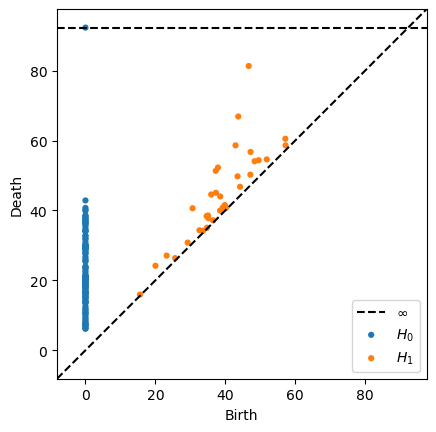

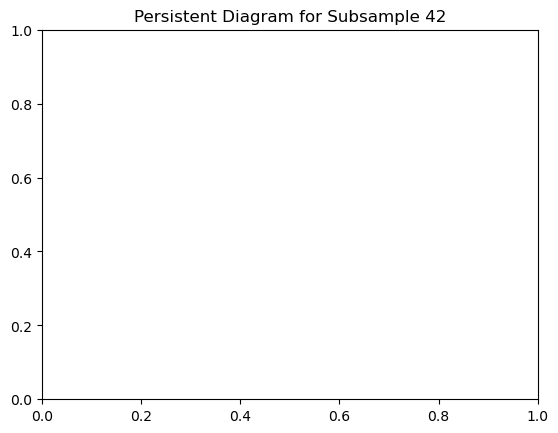

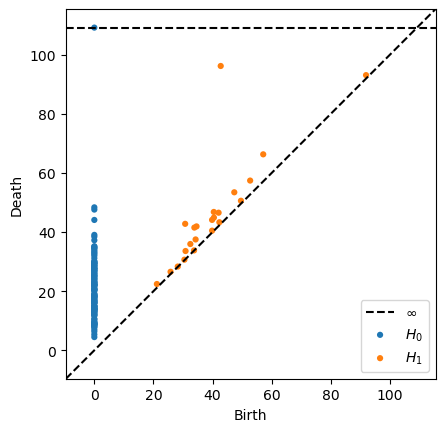

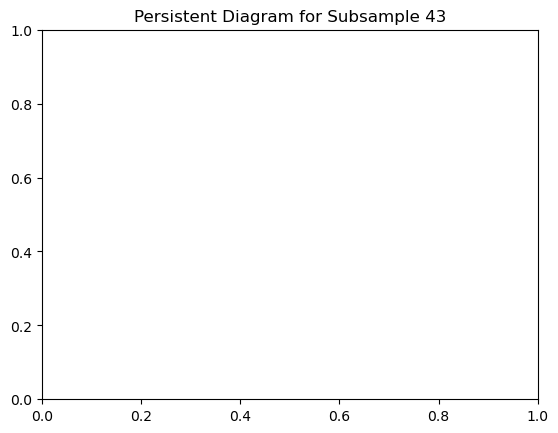

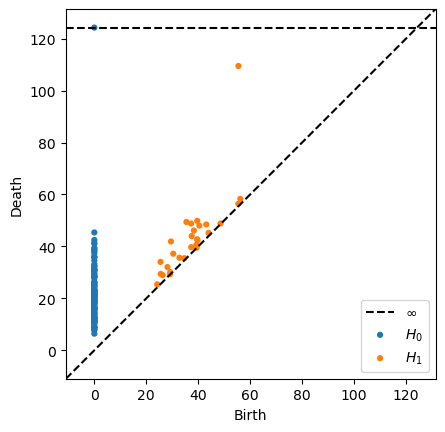

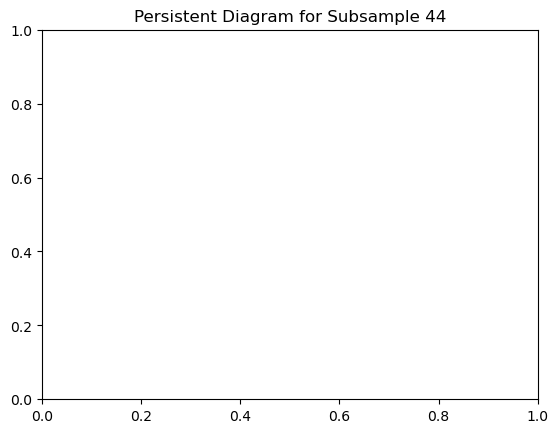

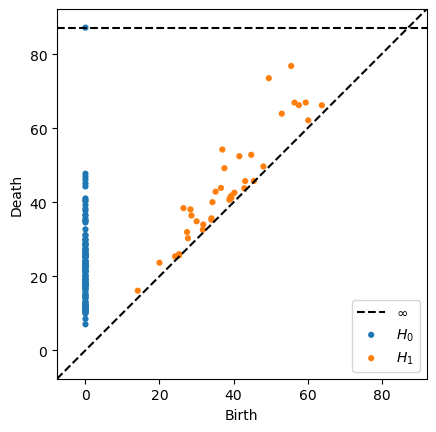

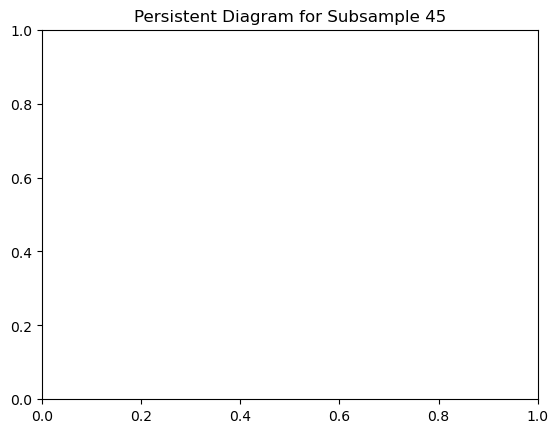

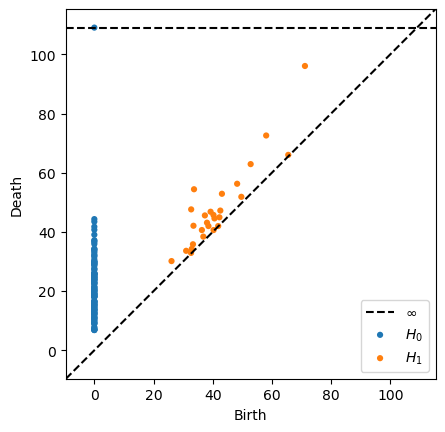

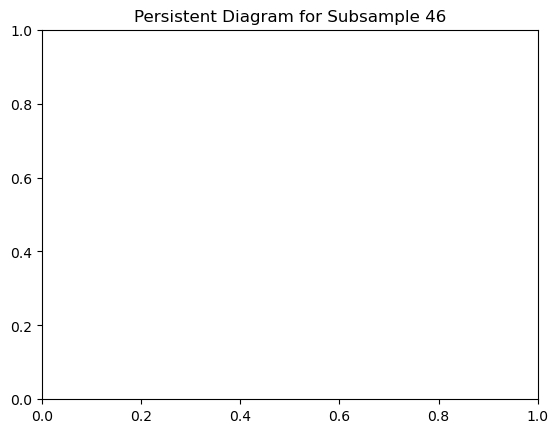

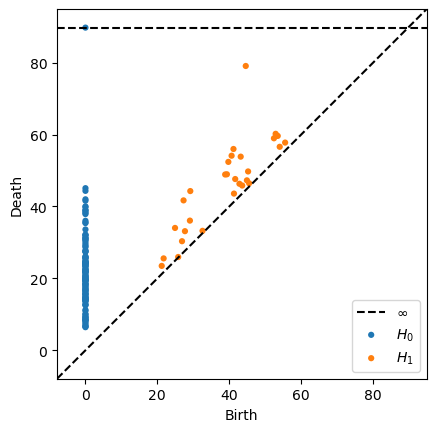

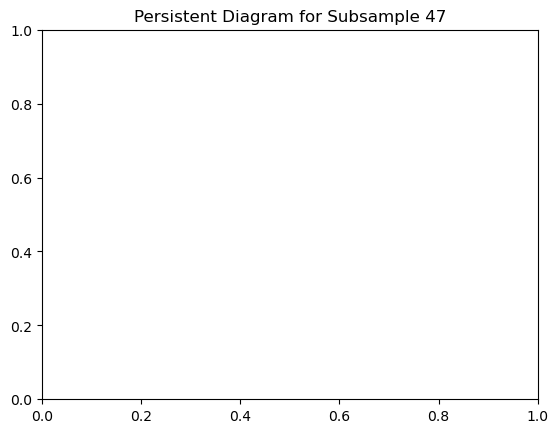

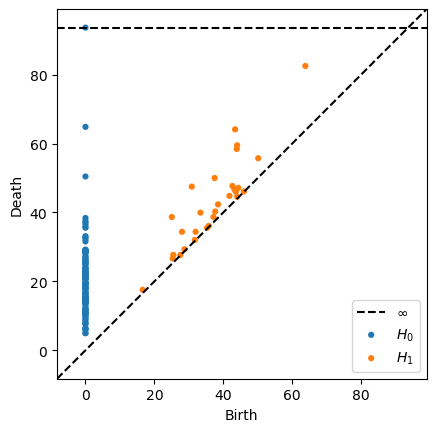

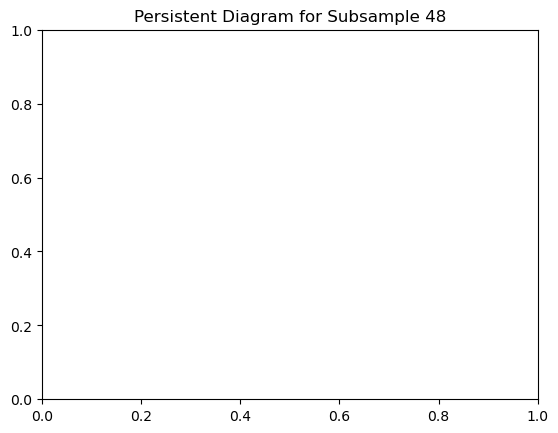

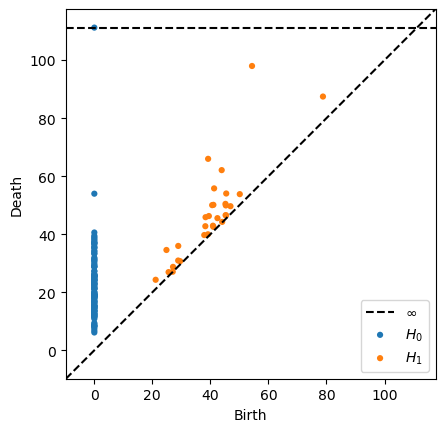

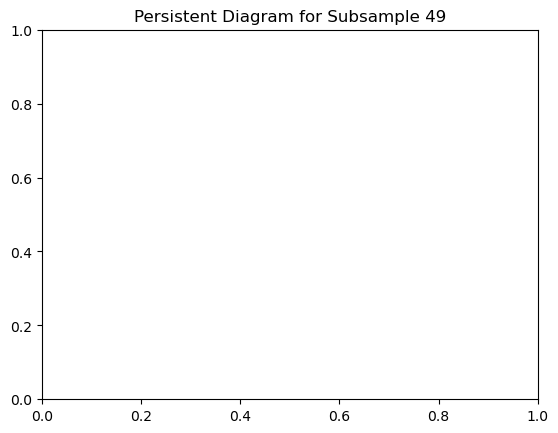

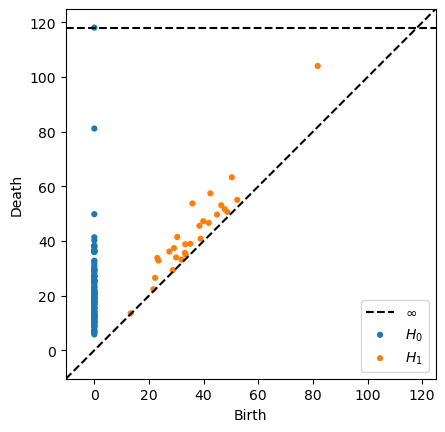

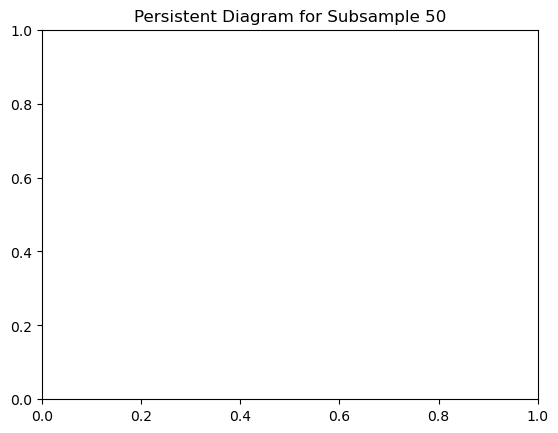

[array([[115.973, 358.993, 14.8808],
       [39.1919, 308.094, 14.617],
       [140.975, 51.7626, 46.6904],
       [62.9902, 21.8353, 70.5],
       [59.6354, 337.429, 20.3469],
       [72.2915, 388.352, 70.5],
       [87.4345, 112.549, 23.3682],
       [150.956, 300.143, 15.1833],
       [87.2036, 96.9533, 25.3536],
       [167.2, 300.857, 62.4849],
       [41.9905, 57.311, 24.4514],
       [36.2062, 301.96, 50.8309],
       [120.705, 117.963, 26.2812],
       [150.551, 288.681, 9.71253],
       [46.9612, 208.246, 29.9339],
       [71.452, 96.8022, 0.5],
       [120.666, 424.962, 33.6073],
       [135.32, 412.886, 12.335],
       [41.2196, 89.6674, 0.5],
       [54.1141, 379.309, 11.3965],
       [61.5539, 12.7322, 60.5809],
       [128.173, 47.667, 37.2572],
       [48.8657, 153.28, 70.5],
       [165.976, 374.784, 26.3697],
       [98.7791, 96.1055, 47.8019],
       [88.424, 421.768, 62.0055],
       [120.912, 419.705, 61.5377],
       [84.6301, 132.904, 61.4411],
       [98.2479, 13

In [40]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

# Assuming time_400_data is a numpy array of shape (240, dim), e.g., (240, 2) for 2D points
# Here is how you can generate 10 random subsamples of size 120 and compute persistent diagrams

# Number of subsamples
n_subsamples = 50
subsample_size = 120

# Store the subsample persistent diagrams
diagrams_list = []
subsample_list = []
print(time_400_data.shape)

# Loop to create subsamples, compute persistent diagrams, and store them
for i in range(n_subsamples):
    # Generate a random subsample of 120 points from time_400_data
    time_400_array = np.array(time_400_data)
    subsample = time_400_array[np.random.choice(time_400_data.shape[0], subsample_size, replace=False), 0:3]
    subsample_list.append(subsample)
    #print(subsample)
    # Compute the persistent homology diagram for this subsample
    diagrams = ripser(subsample)['dgms']
    
    # Store the diagrams
    diagrams_list.append(diagrams)
    
    # Plot the persistent diagram
    plt.figure()
    plot_diagrams(diagrams, show=True)
    plt.title(f"Persistent Diagram for Subsample {i + 1}")

plt.show()
print(subsample_list)


Lets try to see the Wasserstein distance between the sub
diagrams!

In [41]:
from persim import wasserstein
import numpy as np
import pandas as pd

# Assume diagrams_list contains the persistent diagrams as computed before
# Number of diagrams
n_diagrams = len(diagrams_list)

# Initialize an empty matrix to store Wasserstein distances
wasserstein_matrix = np.zeros((n_diagrams, n_diagrams))

# Compute Wasserstein distance between every pair of persistent diagrams
for i in range(n_diagrams):
    for j in range(i, n_diagrams):
        # Compute Wasserstein distance between diagram i and j for H0 (you can extend for H1 if needed)
        distance = wasserstein(diagrams_list[i][0], diagrams_list[j][0])
        wasserstein_matrix[i, j] = distance
        wasserstein_matrix[j, i] = distance  # Since the matrix is symmetric

# Convert to DataFrame for better readability
wasserstein_df = pd.DataFrame(wasserstein_matrix)

# Print the matrix or save it to a CSV file
print(wasserstein_df)
wasserstein_df.to_csv('wasserstein_distance_matrix.csv', index=False)


D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points wit

            0           1           2           3           4           5   \
0     0.000000  145.710638  209.041587  110.544368  130.553673  196.774834   
1   145.710638    0.000000  194.870000  141.130158  151.716442  178.667636   
2   209.041587  194.870000    0.000000  221.411927  138.463575  297.966110   
3   110.544368  141.130158  221.411927    0.000000  179.754570  173.676775   
4   130.553673  151.716442  138.463575  179.754570    0.000000  205.789827   
5   196.774834  178.667636  297.966110  173.676775  205.789827    0.000000   
6   192.271425  172.982012  146.919046  229.946645  109.674433  248.991692   
7   148.383175  102.480276  203.305852  146.228870  128.912972  169.545815   
8   112.307068   91.797575  212.990225  107.485227  137.616074  145.790020   
9   207.714306  169.355420  149.905387  171.889263  135.878808  224.651478   
10  125.302186   83.689414  193.884970  115.290709  132.232052  138.822360   
11  217.388087  229.237513  377.294740  180.367968  297.135453  

D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points wit

In [43]:
from persim import bottleneck
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from itertools import combinations_with_replacement
from tqdm import tqdm

def compute_pair(i, j, diagrams):
    """Compute the H0 bottleneck distance for pair (i,j)."""
    d = bottleneck(diagrams[i][0], diagrams[j][0])
    return i, j, d

def bottleneck_distance_matrix(diagrams, n_jobs=8, verbose=True):
    n = len(diagrams)
    # Prepare empty matrix
    mat = np.zeros((n, n), dtype=float)

    # List all pairs i ≤ j
    pairs = list(combinations_with_replacement(range(n), 2))

    # Compute in parallel
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_pair)(i, j, diagrams)
        for i, j in (tqdm(pairs) if verbose else pairs)
    )

    # Fill matrix
    for i, j, d in results:
        mat[i, j] = d
        mat[j, i] = d

    return mat

if __name__ == "__main__":
    # assume diagrams_list is already defined
    D = bottleneck_distance_matrix(diagrams_list, n_jobs=8, verbose=True)
    df = pd.DataFrame(D)
    print(df)
    df.to_csv("bottleneck_distance_matrix.csv", index=False)


100%|██████████████████████████████████████████████████████████████████████████████| 1275/1275 [03:58<00:00,  5.35it/s]


           0          1          2          3          4          5   \
0    0.000000   3.350211   6.904045   4.142376   8.487083  10.893734   
1    3.350211   0.000000   7.687889   5.719440   6.792145   9.198795   
2    6.904045   7.687889   0.000000   6.456284  10.111568  11.944836   
3    4.142376   5.719440   6.456284   0.000000   4.344707   6.751358   
4    8.487083   6.792145  10.111568   4.344707   0.000000   4.493802   
5   10.893734   9.198795  11.944836   6.751358   4.493802   0.000000   
6    5.355888   3.660950  11.100525   5.376362   3.131195   5.762547   
7   10.325500   7.879822  11.564964   6.968254   9.588264  10.528786   
8    6.526871   4.831932   8.974110   5.127209   4.117302   4.666569   
9    5.185818   5.363274   6.955276   4.708683   4.438206   5.707916   
10   3.315513   4.148537   6.693703   5.592510   6.190594   8.597244   
11   8.639862   6.194183   9.879326   6.634663   7.902626   8.843147   
12   5.022739   5.748047   8.383556   7.192020   4.039604   6.07

In [44]:
from scipy.spatial.distance import directed_hausdorff

# Example sets of 2D points
S1 = subsample_list[0]
S2 = subsample_list[1]

# Compute the Hausdorff distance
d_H = max(directed_hausdorff(S1, S2)[0], directed_hausdorff(S2, S1)[0])
print(f"Hausdorff Distance: {d_H}")


Hausdorff Distance: 43.453786435821684


In [45]:
# Define the Hausdorff distance function
def hausdorff_distance(S1, S2):
    # Compute the Hausdorff distance between two sets S1 and S2
    return max(directed_hausdorff(S1, S2)[0], directed_hausdorff(S2, S1)[0])

# Define the function to compute L_n(t)
def L_n(S_list, S_ref, t):
    N = len(S_list)  # Number of samples
    count = 0  # Counter for the indicator function results

    for S_i in S_list:
        d_H = hausdorff_distance(S_i, S_ref)
        if d_H > t:
            count += 1  # Count if the Hausdorff distance exceeds the threshold t

    # Compute the final average
    return count / N

# Example usage
# List of sets S_list (for example, a list of 2D points or other sets)
S_list = subsample_list  # 100 sets of 10 random 2D points
S_ref = subsample_list[0]  # Reference set (10 random 2D points)

# Set the threshold t
t = 0.5

# Compute L_n(t)
L_n_value = L_n(S_list, S_ref, t)
print("L_n(t):", L_n_value)


L_n(t): 0.98


In [46]:
import numpy as np
from scipy.spatial.distance import directed_hausdorff
from scipy.optimize import brentq

# Define the Hausdorff distance function
def hausdorff_distance(S1, S2):
    return max(directed_hausdorff(S1, S2)[0], directed_hausdorff(S2, S1)[0])

#print(hausdorff_distance(subsample_list[1], subsample_list[0]))
# Define the function L_n(t)
def L_n(t, S_list, S_ref):
    N = len(S_list)  # Number of samples
    count = 0
    
    for S_i in S_list:
        d_H = hausdorff_distance(S_i, S_ref)
        if d_H > t:
            count += 1  # Increment if Hausdorff distance exceeds t

    return count / N

# Inverse function finder: Find t such that L_n(t) = alpha
def L_n_inverse(alpha, S_list, S_ref, t_min=0, t_max=200):
    # Use a root-finding algorithm to find t where L_n(t) = alpha
    return brentq(lambda t: L_n(t, S_list, S_ref) - alpha, t_min, t_max)


# Set alpha = 0.05
alpha = 0.05

# Compute the inverse L_n^{-1}(alpha)
L_inv_alpha = L_n_inverse(alpha, S_list, S_ref)

# Compute c_n
c_n = 2 * L_inv_alpha

print(f"c_n for alpha = {alpha}: {c_n}")


c_n for alpha = 0.05: 117.78433593054542


The problem is this c_n is actually HUGE! It will be an error bar that contains essentially everything.

In [47]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the flattened matrix
stat, p_value = shapiro(bottleneck_matrix.flatten())

print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Data likely follows a normal distribution")
else:
    print("Data does not follow a normal distribution")


Shapiro-Wilk test statistic: 0.8183201551437378, p-value: 0.0
Data does not follow a normal distribution


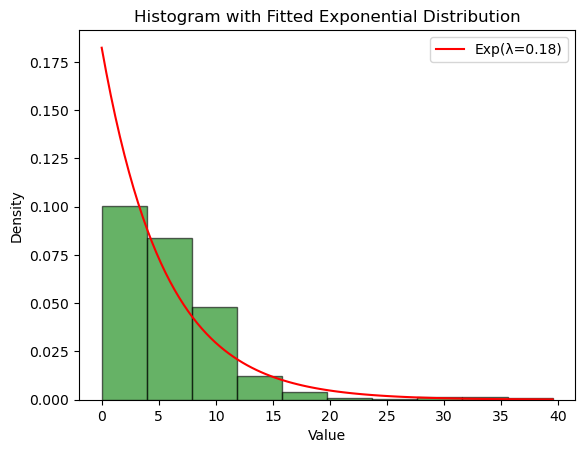

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Assuming bottleneck_matrix is a 10x10 numpy array
data = bottleneck_matrix.flatten()  # Flatten to a 1D array

# Plot the histogram
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')

# Fit and plot the theoretical exponential distribution for comparison
lambda_est = 1 / np.mean(data)  # MLE for exponential distribution
x = np.linspace(0, np.max(data), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_est), 'r-', label=f'Exp(λ={lambda_est:.2f})')

plt.title("Histogram with Fitted Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [49]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

# Assuming bottleneck_matrix is your dataset
data = bottleneck_matrix.flatten()  # Flatten the matrix to a 1D array
print(data)

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(data, floc=0)  # Fix location at 0 if data is positive

# Generate values to plot the Gamma PDF
x = np.linspace(0, np.max(data), 100)

# Plot the histogram and the fitted gamma distribution
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, gamma.pdf(x, shape, loc, scale), 'r-', label=f'Gamma PDF (shape={shape:.2f}, rate={1/scale:.2f})')
plt.title("Histogram with Fitted Gamma Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


[0.         3.35021114 6.9040451  ... 0.         0.         0.        ]


FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'gamma' requires that 0 < (x - loc)/scale  < inf for each x in `data`.

To calcul;ate the Betti number after doing the error bar thing is a possible way to do it.

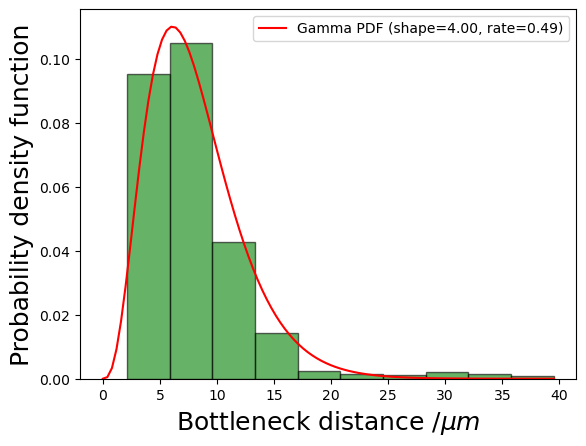

In [55]:
# Remove zero values from the data
data_nonzero = data[data > 0]  # Filter out zeros

# Fit a gamma distribution to the non-zero data
shape, loc, scale = gamma.fit(data_nonzero, floc=0)  # Fix location at 0 if data is positive

# Generate values to plot the Gamma PDF
x = np.linspace(0, np.max(data_nonzero), 100)

# Plot the histogram and the fitted gamma distribution
plt.hist(data_nonzero, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, gamma.pdf(x, shape, loc, scale), 'r-', label=f'Gamma PDF (shape={shape:.2f}, rate={1/scale:.2f})')
plt.xlabel("Bottleneck distance $/\mu m$",fontsize = 18)
plt.ylabel("Probability density function", fontsize = 18)
plt.legend()
plt.show()



In [22]:
from scipy.stats import gamma
import numpy as np

# Assuming data_nonzero is the dataset without zeros
shape, loc, scale = gamma.fit(data_nonzero, floc=0)
log_likelihood = np.sum(gamma.logpdf(data_nonzero, shape, loc=loc, scale=scale))
print(f"Log-Likelihood: {log_likelihood}")


Log-Likelihood: -5464.331719056464


In [23]:
from scipy.stats import gamma

# Assuming data_nonzero is the non-zero dataset
shape, loc, scale = gamma.fit(data_nonzero, floc=0)  # Fit gamma distribution with fixed location at 0

# Calculate the 5th percentile (0.05 confidence interval lower bound)
error_bound = gamma.ppf(0.95, shape, loc=loc, scale=scale)

print(f"5th Percentile (0.95 confidence interval): {error_bound}")


5th Percentile (0.95 confidence interval): 16.146395102733827


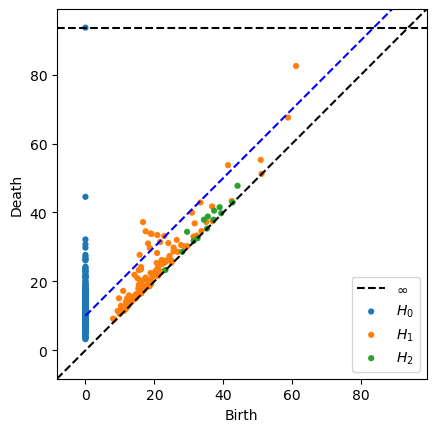

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from sklearn.cluster import DBSCAN

# Generate some sample data (or use your own data)
'''
np.random.seed(0)
data = np.concatenate([
    np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[7, 7], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[2, 7], scale=0.3, size=(100, 2)),
])
'''
# Step 1: Compute persistent homology
diagrams = ripser(sample_coords, maxdim=2)['dgms']
# Create figure and axis
fig, ax = plt.subplots()

# Set background color
#ax.set_facecolor('#F7F3E8')  # Light beige for axes

ax.set_xlabel("Birth/$\mu m$")
ax.set_ylabel("Death/$\mu m$")
# Step 2: Visualize the persistence diagram for H0 (connected components)
from persim import plot_diagrams
plot_diagrams(diagrams, ax = ax)




# Plot the line y = x + 10
plt.plot(np.linspace(0, 100.7, 100), np.linspace(10, 110.7,100), color='blue', linestyle='--', label=r'$y = x + 10.7$')
plt.show()



In [20]:
import matplotlib as mpl
print(mpl.styles.available)

AttributeError: module 'matplotlib' has no attribute 'styles'

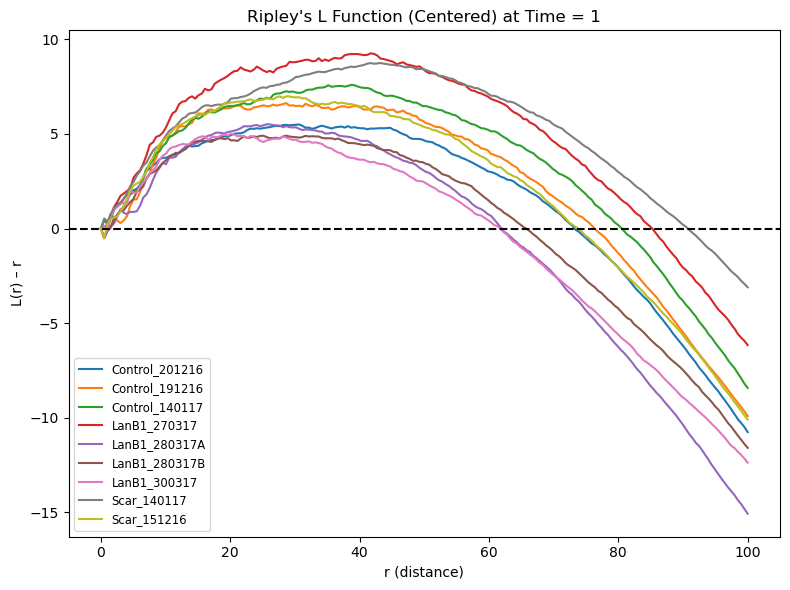

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def ripley_L(xy, radii, area):
    """
    Compute Ripley's L function for given 2D points:
      L(r) = sqrt(K(r)/pi),   K(r)= area/(n(n-1)) * (# pairs ≤ r)
    """
    n = xy.shape[0]
    D = distance_matrix(xy, xy)
    L = np.zeros_like(radii, dtype=float)
    for i, r in enumerate(radii):
        # count all pairs with distance <= r (excluding self‐pairs)
        count = np.sum(D <= r) - n
        K = area * count / (n * (n - 1))
        L[i] = np.sqrt(K / np.pi)
    return L

# List of nine files to compare
files = [
    'Control_201216.csv',
    'Control_191216.csv',
    'Control_140117.csv',
    'LanB1_270317.csv',
    'LanB1_280317A.csv',
    'LanB1_280317B.csv',
    'LanB1_300317.csv',
    'Scar_140117.csv',
    'Scar_151216.csv'
]

# Define the range of radii for which to compute L
radii = np.linspace(0, 100, 200)  # adjust max radius and number of bins as needed

plt.figure(figsize=(8, 6))
for fname in files:
    df = pd.read_csv(fname)
    pts = df[df['Time'] == 1][['Position X', 'Position Y']].values
    # estimate observation window area via bounding box
    x_min, y_min = pts.min(axis=0)
    x_max, y_max = pts.max(axis=0)
    area = (x_max - x_min) * (y_max - y_min)
    L = ripley_L(pts, radii, area)
    plt.plot(radii, L - radii, label=fname.split('.')[0])

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('r (distance)')
plt.ylabel('L(r) – r')
plt.title("Ripley's L Function (Centered) at Time = 1")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()


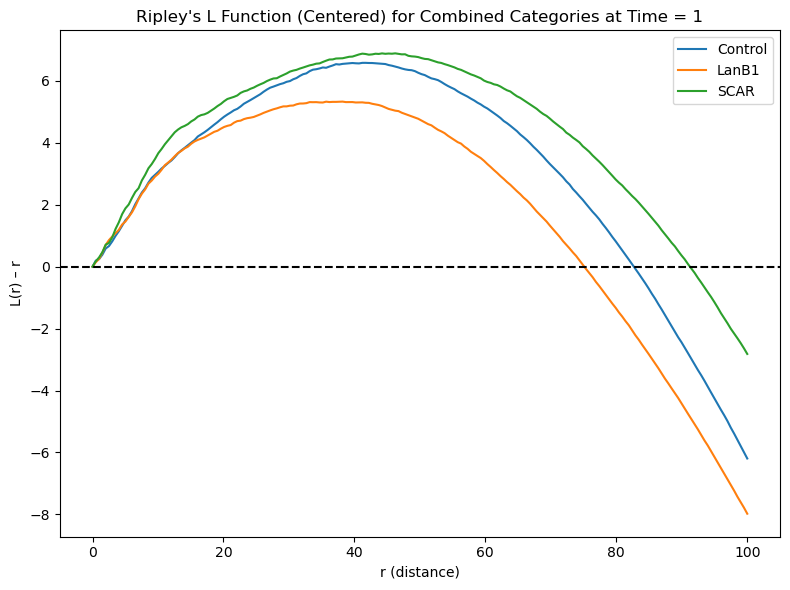

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def ripley_L(xy, radii, area):
    """
    Compute Ripley's L function for a 2D point pattern:
      L(r) = sqrt(K(r)/pi),  K(r)= area/(n(n-1)) * (# pairs <= r)
    """
    n = xy.shape[0]
    D = distance_matrix(xy, xy)
    L = np.zeros_like(radii)
    for i, r in enumerate(radii):
        count = np.sum(D <= r) - n  # exclude self-distances
        K = area * count / (n * (n - 1))
        L[i] = np.sqrt(K / np.pi)
    return L

# Define your category-to-file mapping
categories = {
    'Control': [
        'Control_201216.csv',
        'Control_191216.csv',
        'Control_140117.csv',
        'Control_130117.csv'
    ],
    'LanB1': [
        'LanB1_270317.csv',
        'LanB1_280317A.csv',
        'LanB1_280317B.csv',
        'LanB1_300317.csv'
    ],
    'SCAR': [
        'Scar_140117.csv',
        'Scar_151216.csv',
        'Scar_201216.csv'
    ]
}

# Radii grid for L
radii = np.linspace(0, 100, 200)

plt.figure(figsize=(8, 6))
for cat, files in categories.items():
    # Aggregate all (X,Y) at Time = 1
    pts_list = []
    for fname in files:
        df = pd.read_csv(fname)
        pts_list.append(df[df['Time'] == 1][['Position X', 'Position Y']].values)
    all_pts = np.vstack(pts_list)

    # Estimate area from bounding box
    x_min, y_min = all_pts.min(axis=0)
    x_max, y_max = all_pts.max(axis=0)
    area = (x_max - x_min) * (y_max - y_min)

    # Compute and plot L(r) - r
    L_vals = ripley_L(all_pts, radii, area)
    plt.plot(radii, L_vals - radii, label=cat)

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('r (distance)')
plt.ylabel('L(r) – r')
plt.title("Ripley's L Function (Centered) for Combined Categories at Time = 1")
plt.legend()
plt.tight_layout()
plt.show()


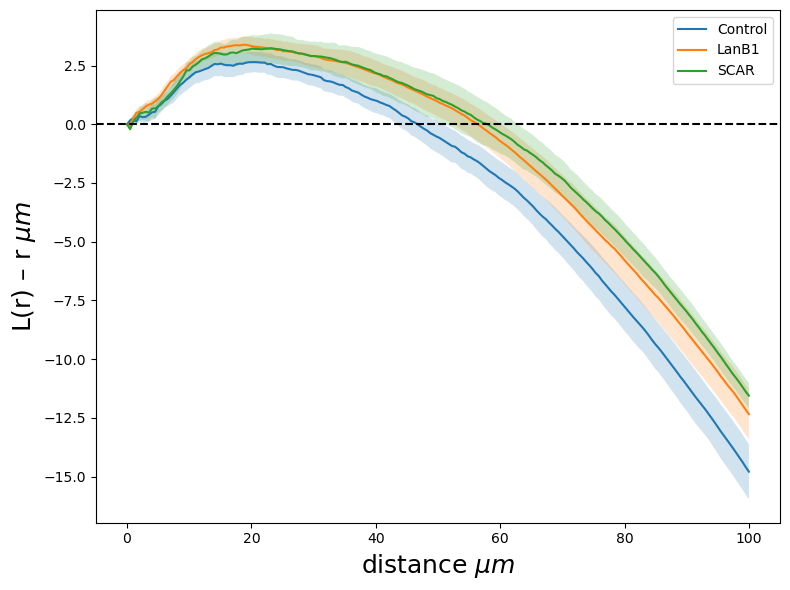

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def ripley_L(xy, radii, area):
    n = xy.shape[0]
    D = distance_matrix(xy, xy)
    L = np.zeros_like(radii)
    for i, r in enumerate(radii):
        count = np.sum(D <= r) - n
        K = area * count / (n * (n - 1))
        L[i] = np.sqrt(K / np.pi)
    return L

# 1. Define categories and their files
categories = {
    'Control': [
        'Control_201216.csv',
        'Control_191216.csv',
        'Control_140117.csv',
        'Control_130117.csv'
    ],
    'LanB1': [
        'LanB1_270317.csv',
        'LanB1_280317A.csv',
        'LanB1_280317B.csv',
        'LanB1_300317.csv'
    ],
    'SCAR': [
        'Scar_140117.csv',
        'Scar_151216.csv',
        'Scar_201216.csv'
    ]
}

# 2. Radii at which to compute L
radii = np.linspace(0, 100, 200)

plt.figure(figsize=(8, 6))

# 3. Loop categories
for cat, files in categories.items():
    L_all = []
    for fname in files:
        df = pd.read_csv(fname)
        pts = df[df['Time'] == 400][['Position X', 'Position Y']].values
        # estimate area
        xmin, ymin = pts.min(axis=0)
        xmax, ymax = pts.max(axis=0)
        area = (xmax - xmin) * (ymax - ymin)
        # compute L
        L_all.append(ripley_L(pts, radii, area) - radii)
    L_all = np.vstack(L_all)  # shape (n_files, n_radii)

    # 4. Compute mean and SEM across files
    mean_L = L_all.mean(axis=0)
    sem_L  = L_all.std(axis=0, ddof=1) / np.sqrt(L_all.shape[0])

    # 5. Plot with shaded error band
    plt.plot(radii, mean_L, label=cat)
    plt.fill_between(radii,
                     mean_L - sem_L,
                     mean_L + sem_L,
                     alpha=0.2)

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('distance $\mu m$',fontsize = 18)
plt.ylabel('L(r) – r $\mu m$', fontsize = 18)
plt.legend()
plt.tight_layout()
plt.show()


Area under average L(r)-r from r=0 to 80 for each group:
  Control : -67.739
  LanB1   : 53.161
  SCAR    : 64.000


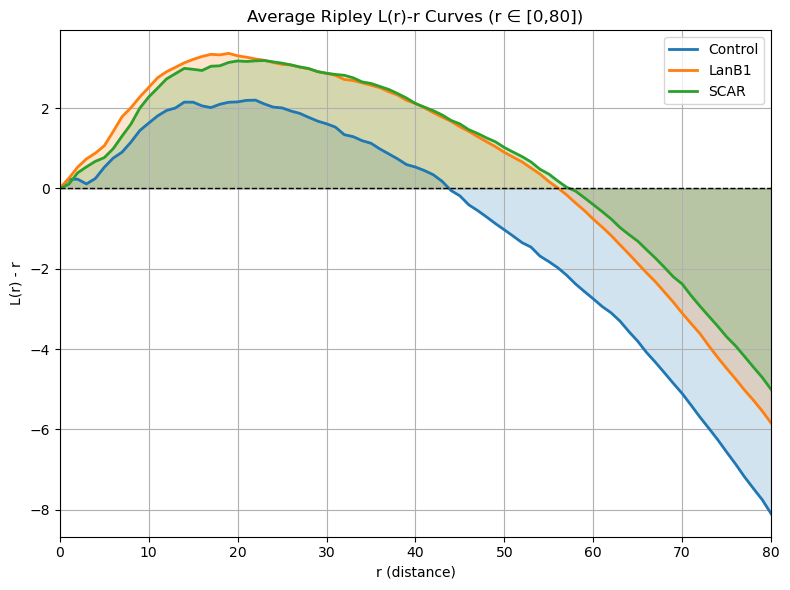

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# ------------------------------------------------------------
# Helper function: Compute L(r) - r for a set of 2D points
# ------------------------------------------------------------
def ripley_L_minus_r(points, r_vals, area=None):
    """
    Compute L(r) - r for a 2D point cloud (no edge correction).
    points: (N,2) numpy array of (x,y) positions.
    r_vals: 1D array of radii at which to evaluate L(r) - r.
    area:   total area of the region. If None, defaults to bounding-box area.
    Returns: 1D array of L(r) - r, same length as r_vals.
    """
    N = points.shape[0]
    if N < 2:
        # If fewer than 2 points, L(r)-r = -r for all r
        return -r_vals
    
    # Determine area if not provided
    if area is None:
        minx, miny = points.min(axis=0)
        maxx, maxy = points.max(axis=0)
        area = (maxx - minx) * (maxy - miny)
    
    ρ = N / area  # intensity
    
    # Compute pairwise distances once
    D = distance_matrix(points, points)
    np.fill_diagonal(D, np.inf)  # ignore self-pairs
    
    L_minus_r = np.zeros_like(r_vals, dtype=float)
    for idx, r in enumerate(r_vals):
        # Count all pairs with distance ≤ r
        num_pairs = np.sum(D <= r)
        # Estimate K(r) = (# pairs) / (N * ρ)
        K_r = num_pairs / (N * ρ)
        # Convert to L(r)
        L_r = np.sqrt(K_r / np.pi)
        L_minus_r[idx] = L_r - r
    
    return L_minus_r

# ------------------------------------------------------------
# Main script: Compare three groups, each with multiple files
# ------------------------------------------------------------
datasets = {
    'Control': [
        'Control_201216.csv',
        'Control_191216.csv',
        'Control_140117.csv',
    ],
    'LanB1': [
        'LanB1_270317.csv',
        'LanB1_280317A.csv',
        'LanB1_280317B.csv',
        'LanB1_300317.csv'
    ],
    'SCAR': [
        'Scar_140117.csv',
        'Scar_151216.csv',
        'Scar_201216.csv'
    ]
}

# Define r-grid from 0 to 80 (step 1.0)
r_max = 80.0
dr    = 1.0
r_vals = np.arange(0.0, r_max + dr, dr)

# Dictionary to store average L(r)-r curves for each group
avg_LminusR = {}

for group_name, file_list in datasets.items():
    Lcurves = []  # will hold one L(r)-r array per file
    
    for fname in file_list:
        # 1) Load CSV
        df = pd.read_csv(fname)
        
        # 2) Extract all (x,y) at Time == 1
        pts2D = df[df['Time'] == 400][['Position X', 'Position Y']].values
        
        # 3) Compute L(r)-r for this file
        LmR = ripley_L_minus_r(pts2D, r_vals)
        Lcurves.append(LmR)
    
    # 4) Convert to numpy array and average across files
    Lcurves_arr = np.vstack(Lcurves)  # shape: (n_files_in_group, len(r_vals))
    avg_curve    = Lcurves_arr.mean(axis=0)
    avg_LminusR[group_name] = avg_curve

# ------------------------------------------------------------
# 5) Integrate each group's average curve from r=0 to r=80
# ------------------------------------------------------------
areas = {}
for group_name, LmR in avg_LminusR.items():
    area = np.trapz(LmR, r_vals)
    areas[group_name] = area

# 6) Print the results
print("Area under average L(r)-r from r=0 to 80 for each group:")
for group_name, area_val in areas.items():
    print(f"  {group_name:8s}: {area_val:.3f}")

# ------------------------------------------------------------
# 7) Plot the three average curves and shade their areas
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
colors = {'Control': 'tab:blue', 'LanB1': 'tab:orange', 'SCAR': 'tab:green'}

for group_name, LmR in avg_LminusR.items():
    plt.plot(r_vals, LmR, color=colors[group_name], lw=2, label=group_name)
    plt.fill_between(r_vals, 0, LmR, color=colors[group_name], alpha=0.2)

plt.axhline(0, color='k', lw=1, ls='--')
plt.xlim(0, r_max)
plt.xlabel('r (distance)')
plt.ylabel('L(r) - r')
plt.title('Average Ripley L(r)-r Curves (r ∈ [0,80])')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
from ripser import ripser
from persim.landscapes import PersLandscapeApprox
import matplotlib.pyplot as plt

# Example data: Replace with your point cloud dataset
# Assuming `data` is a single point cloud or a list of point clouds for multiple time steps
  # 100 random points in 2D

# Step 1: Compute the persistence diagram
diagrams = ripser(sample_coords)['dgms']

# Step 2: Compute the persistent landscape for H0 (connected components)
landscape = PersLandscapeApprox(dgms=diagrams)  # For H0 features


# Step 4 (Optional): Access the landscape values for further computation
landscape_values = landscape.values
print(f"Landscape values (truncated): {landscape_values[:5]}")

Landscape values (truncated): [[0.         0.08925553 0.17851106 ... 0.17851106 0.08925553 0.        ]
 [0.         0.08925553 0.17851106 ... 0.         0.         0.        ]
 [0.         0.08925553 0.17851106 ... 0.         0.         0.        ]
 [0.         0.08925553 0.17851106 ... 0.         0.         0.        ]
 [0.         0.08925553 0.17851106 ... 0.         0.         0.        ]]
